In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

# MCMC and Particle Systems - Mathematical Analysis

## Importance Sampling and Resampling

The importance sampling approach ensures that the distribution of the final sample is empirically distributed from the target $\pi$. The distribution of the final sample is close to being (empirically) agreement with $\pi$, and is thus a valid importance sampling methodology. In other words, the importance sampling weight does not need to be adjusted after the MCMC step, as already seen in Lemma 14.1.

As above, reduced variance resampling strategies can also be implemented at the resampling stage. Note that the proposed kernel $g$ needs not to be known numerically, as long as simulations from $g$ are possible. Gilks and Berzuini (2001) also extend this algorithm to a model choice setting with sequentially observed data, as in Section 11.2, and they use a reversible jump algorithm as part of the evolution step 3. Obviously, the success of this additional step in fighting degeneracy depends on the setup and several iterations of the MCMC step could be necessary to reach regions of acceptable values of $\pi$.

As noted in Chapp and Goutall (2001), the **Augmentation step 1** in Algorithm 14.60 can itself be supplemented by an importance sampling step where the entire vector $\mathbf{x}_i^{(t-1)}$ may be modified through an importance distribution $g$ (and a corresponding modification of the weight). These authors also suggested **tempering schemes** to smooth the bridge between $g$ and the target distribution $\pi$. As the authors propose to use a sequence of geometric averages:

$$\pi^{(m)}(\mathbf{x}) \propto g^{am}(\mathbf{x}) \pi^{1-am}(\mathbf{x})$$

where $0 < a_m < 1$ increases from $0$ to $1$ (see Note 13.6.2 for an introduction to tempering).

## 14.3.7 Convergence of Particle Systems

So far, the sequential Monte Carlo methods have been discussed from a rather practical point of view, in that the convergence properties of the various estimators or approximations have been derived from those of regular importance sampling techniques, that is, mostly from the Law of Large Numbers. We must, however, take into account an additional dimension, when compared with importance sampling (as in Chapter 3), due to the iterative nature of the method. Each resampling step uses of Gilks and Berzuini (2001) assures that the speed gain goes to infinity at each iteration, but this is unrealistic and contradicts the speed requirement which is at the core of the method.

More recent results, as those of Kunsch (2005), give a better understanding of how these algorithms converge and make explicit the intuition that "there isn't so much thing as a free lunch," namely, that it does not seem possible to consider a sequence of target distributions without incurring an increase in the computational expense.

Although the proofs are too advanced for the level of this book, let us point out here that Kunsch (2004) shows, for state-space models, that the variance of the estimator $\hat{\mu}_t$ does not increase exponentially fast with $t$, to achieve convergence in total variation for the sequential importance sampling/particle filter method. (This result is not surprising in light of the intuitive development of Section 14.3.1.) Chopin (2004) also establishes Central Limit Theorems for both the multinomial and the residual sampling schemes, with the side result that the asymptotic variance is smaller for the residual sampling approach, again a rather comforting result. Note that for the basic sequential sampling in a fixed dimensional setting where

$$\omega_t^{(i)} \propto \omega_{t-1}^{(i)} \frac{\pi_t(\mathbf{Z}_i)}{\pi_{t-1}(\mathbf{Z}_i)}$$

## Central Limit Theorem

A Central Limit Theorem also holds:

$$\sqrt{N} \left\{ \frac{\sum_{i=1}^N \omega_t^{(i)} h(\mathbf{Z}_i)}{\sum_{i=1}^N \omega_t^{(i)}} - \mathbb{E}_{\pi_t}[h(\mathbf{Z})] \right\} \stackrel{d}{\to} \mathcal{N}(0, V_t^{(h)})$$

where

$$V_t^{(h)} = \mathbb{E}_{\pi_t} \left[ \frac{\pi_t(\mathbf{Z})}{\pi_0(\mathbf{Z})} \left\{ h(\mathbf{Z}) - \mathbb{E}_{\pi_t}[h(\mathbf{Z})] \right\}^2 \right]$$

by an application of the usual Central Limit Theorem, since the $\mathbf{Z}_i$'s are independent. (Establishing the Central Limit Theorems for the two other sampling schemes of Section 14.3.5 is beyond our scope.)

## Comparison with Three Sampling Schemes

In comparing the three sampling schemes, Chopin (2004) obtained the important comparison that, for a fixed state space of dimension $p$, and under the assumption that the likelihood ratio $L_t$ has finite variance for all $t$, the three corresponding asymptotic variances satisfy:

$$V_t^{(h)} = O(p^{2^{-1}}), \quad V_t^{(m)} = O(p^{2/3}), \quad \text{and} \quad V_t^{(r)} = O(p^{2/3})$$

where $V_t^{(m)}$ and $V_t^{(r)}$ denote the asymptotic variances for the estimators of $\mathbb{E}_{\pi_t}[h(\mathbf{Z})]$ based on the multinomial and the residual resampling schemes, respectively. Therefore, resampling is more expensive in terms of the mere reweighting scheme. This is not a factor because the extra computational cost is less than the gain in reduction of variance.

In all cases, to fight degeneracy, that is, to keep the effective sample size from decreasing as a power of $t$, Crisan et al. (1999), Del Moral and Miclo (2000) and Chopin (2004) stress that the number of particles must increase as a power of $t$. Related entries to the study of the convergence of particle filters.

---

## Mathematical Notation Summary

- $\pi$: Target distribution
- $g$: Proposal kernel
- $\mathbf{x}_i^{(t)}$: Particle $i$ at time $t$
- $\omega_t^{(i)}$: Weight of particle $i$ at time $t$
- $N$: Number of particles
- $V_t^{(h)}$: Asymptotic variance for function $h$
- $\mathbb{E}_{\pi_t}[\cdot]$: Expectation under distribution $\pi_t$
- $\mathcal{N}(0, V)$: Normal distribution with mean 0 and variance $V$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.special import logsumexp
import warnings
warnings.filterwarnings('ignore')

class ParticleFilter:
    """
    Sequential Monte Carlo (Particle Filter) implementation with multiple resampling schemes
    """
    
    def __init__(self, n_particles=1000, resampling_method='multinomial'):
        self.n_particles = n_particles
        self.resampling_method = resampling_method
        self.particles = None
        self.weights = None
        self.log_weights = None
        self.effective_sample_size = None
        
    def initialize_particles(self, initial_dist):
        """Initialize particles from initial distribution"""
        self.particles = initial_dist.rvs(size=self.n_particles)
        self.weights = np.ones(self.n_particles) / self.n_particles
        self.log_weights = np.log(self.weights)
        
    def predict(self, transition_kernel, *args):
        """Prediction step - propagate particles through transition kernel"""
        for i in range(self.n_particles):
            self.particles[i] = transition_kernel(self.particles[i], *args)
    
    def update_weights(self, likelihood_func, observation, *args):
        """Update particle weights based on likelihood of observation"""
        for i in range(self.n_particles):
            log_likelihood = likelihood_func(observation, self.particles[i], *args)
            self.log_weights[i] += log_likelihood
        
        # Normalize weights
        self.log_weights -= logsumexp(self.log_weights)
        self.weights = np.exp(self.log_weights)
        
        # Calculate effective sample size
        self.effective_sample_size = 1.0 / np.sum(self.weights**2)
    
    def resample(self, threshold=0.5):
        """Resample particles if ESS falls below threshold"""
        if self.effective_sample_size < threshold * self.n_particles:
            if self.resampling_method == 'multinomial':
                indices = self._multinomial_resample()
            elif self.resampling_method == 'residual':
                indices = self._residual_resample()
            elif self.resampling_method == 'systematic':
                indices = self._systematic_resample()
            else:
                raise ValueError(f"Unknown resampling method: {self.resampling_method}")
            
            self.particles = self.particles[indices]
            self.weights = np.ones(self.n_particles) / self.n_particles
            self.log_weights = np.log(self.weights)
            return True
        return False
    
    def _multinomial_resample(self):
        """Multinomial resampling"""
        return np.random.choice(self.n_particles, size=self.n_particles, p=self.weights)
    
    def _residual_resample(self):
        """Residual resampling - more efficient than multinomial"""
        n_copies = np.floor(self.n_particles * self.weights).astype(int)
        residual = self.n_particles * self.weights - n_copies
        
        indices = []
        for i in range(self.n_particles):
            indices.extend([i] * n_copies[i])
        
        n_remaining = self.n_particles - len(indices)
        if n_remaining > 0:
            residual_weights = residual / np.sum(residual)
            additional_indices = np.random.choice(
                self.n_particles, size=n_remaining, p=residual_weights
            )
            indices.extend(additional_indices)
        
        return np.array(indices)
    
    def _systematic_resample(self):
        """Systematic resampling"""
        cumsum = np.cumsum(self.weights)
        u = (np.arange(self.n_particles) + np.random.random()) / self.n_particles
        indices = np.searchsorted(cumsum, u)
        return indices
    
    def estimate_mean(self):
        """Weighted mean estimate"""
        return np.average(self.particles, weights=self.weights)
    
    def estimate_variance(self):
        """Weighted variance estimate"""
        mean = self.estimate_mean()
        return np.average((self.particles - mean)**2, weights=self.weights)


class SequentialMonteCarlo:
    """
    Sequential Monte Carlo with importance sampling and tempering
    """
    
    def __init__(self, n_particles=1000):
        self.n_particles = n_particles
        self.particles = None
        self.weights = None
        self.log_weights = None
        
    def importance_sampling_step(self, target_log_pdf, proposal_sampler, proposal_log_pdf):
        """Standard importance sampling step"""
        # Sample from proposal
        self.particles = proposal_sampler(self.n_particles)
        
        # Calculate importance weights
        self.log_weights = np.zeros(self.n_particles)
        for i in range(self.n_particles):
            log_target = target_log_pdf(self.particles[i])
            log_proposal = proposal_log_pdf(self.particles[i])
            self.log_weights[i] = log_target - log_proposal
        
        # Normalize weights
        self.log_weights -= logsumexp(self.log_weights)
        self.weights = np.exp(self.log_weights)
    
    def tempering_sequence(self, target_log_pdf, proposal_log_pdf, n_steps=10):
        """
        Geometric tempering sequence: π^(m)(x) ∝ g^(a_m)(x) * π^(1-a_m)(x)
        """
        if self.particles is None:
            raise ValueError("Particles not initialized. Run importance_sampling_step first.")
        
        # Create tempering schedule
        alphas = np.linspace(0, 1, n_steps + 1)[1:]  # Skip alpha=0
        
        results = []
        for alpha in alphas:
            # Update weights with tempered distribution
            for i in range(self.n_particles):
                log_target = target_log_pdf(self.particles[i])
                log_proposal = proposal_log_pdf(self.particles[i])
                # Tempered log-density: (1-α)*log(g) + α*log(π)
                tempered_log_density = (1 - alpha) * log_proposal + alpha * log_target
                self.log_weights[i] = tempered_log_density - log_proposal
            
            # Normalize weights
            self.log_weights -= logsumexp(self.log_weights)
            self.weights = np.exp(self.log_weights)
            
            # Store results
            mean_estimate = np.average(self.particles, weights=self.weights)
            var_estimate = np.average((self.particles - mean_estimate)**2, weights=self.weights)
            ess = 1.0 / np.sum(self.weights**2)
            
            results.append({
                'alpha': alpha,
                'mean': mean_estimate,
                'variance': var_estimate,
                'ess': ess
            })
        
        return results


class MCMCParticleFilter:
    """
    MCMC-enhanced Particle Filter with augmentation steps
    """
    
    def __init__(self, n_particles=1000, mcmc_steps=5):
        self.n_particles = n_particles
        self.mcmc_steps = mcmc_steps
        self.particles = None
        self.weights = None
        self.log_weights = None
    
    def initialize(self, initial_sampler):
        """Initialize particles"""
        self.particles = initial_sampler(self.n_particles)
        self.weights = np.ones(self.n_particles) / self.n_particles
        self.log_weights = np.log(self.weights)
    
    def mcmc_augmentation_step(self, log_target_pdf, proposal_std=0.1):
        """
        MCMC augmentation step - improve particle diversity
        """
        for i in range(self.n_particles):
            current_particle = self.particles[i].copy()
            current_log_prob = log_target_pdf(current_particle)
            
            for _ in range(self.mcmc_steps):
                # Propose new state
                proposal = current_particle + np.random.normal(0, proposal_std, size=current_particle.shape)
                proposal_log_prob = log_target_pdf(proposal)
                
                # Metropolis-Hastings acceptance
                log_alpha = proposal_log_prob - current_log_prob
                if np.log(np.random.random()) < log_alpha:
                    current_particle = proposal
                    current_log_prob = proposal_log_prob
            
            self.particles[i] = current_particle
    
    def particle_filter_step(self, observation, likelihood_func, transition_kernel):
        """Combined particle filter step with MCMC augmentation"""
        # Prediction
        for i in range(self.n_particles):
            self.particles[i] = transition_kernel(self.particles[i])
        
        # Weight update
        for i in range(self.n_particles):
            log_likelihood = likelihood_func(observation, self.particles[i])
            self.log_weights[i] += log_likelihood
        
        # Normalize weights
        self.log_weights -= logsumexp(self.log_weights)
        self.weights = np.exp(self.log_weights)
        
        # MCMC augmentation
        def log_target(x):
            return likelihood_func(observation, x)
        
        self.mcmc_augmentation_step(log_target)
        
        # Resample if needed
        ess = 1.0 / np.sum(self.weights**2)
        if ess < self.n_particles / 2:
            indices = np.random.choice(self.n_particles, size=self.n_particles, p=self.weights)
            self.particles = self.particles[indices]
            self.weights = np.ones(self.n_particles) / self.n_particles
            self.log_weights = np.log(self.weights)


# Example usage and demonstration
def demo_particle_filter():
    """Demonstrate particle filter on a simple state-space model"""
    np.random.seed(42)
    
    # True state evolution (random walk)
    n_timesteps = 50
    true_states = np.zeros(n_timesteps)
    observations = np.zeros(n_timesteps)
    
    # Generate true trajectory
    for t in range(1, n_timesteps):
        true_states[t] = true_states[t-1] + np.random.normal(0, 0.1)
        observations[t] = true_states[t] + np.random.normal(0, 0.5)
    
    # Define model functions
    def transition_kernel(x):
        return x + np.random.normal(0, 0.1)
    
    def log_likelihood(obs, state):
        return stats.norm.logpdf(obs, loc=state, scale=0.5)
    
    # Initialize particle filter
    pf = ParticleFilter(n_particles=1000, resampling_method='systematic')
    pf.initialize_particles(stats.norm(0, 1))
    
    # Run particle filter
    estimates = []
    variances = []
    ess_history = []
    
    for t in range(1, n_timesteps):
        # Predict
        pf.predict(transition_kernel)
        
        # Update
        pf.update_weights(log_likelihood, observations[t])
        
        # Resample
        resampled = pf.resample()
        
        # Store estimates
        estimates.append(pf.estimate_mean())
        variances.append(pf.estimate_variance())
        ess_history.append(pf.effective_sample_size)
    
    return true_states[1:], observations[1:], estimates, variances, ess_history


def demo_tempering():
    """Demonstrate tempering for bridging proposal and target"""
    np.random.seed(42)
    
    # Define target (mixture of Gaussians)
    def target_log_pdf(x):
        return logsumexp([stats.norm.logpdf(x, -2, 0.5), stats.norm.logpdf(x, 2, 0.5)]) + np.log(0.5)
    
    # Define proposal (single Gaussian)
    def proposal_sampler(n):
        return np.random.normal(0, 2, n)
    
    def proposal_log_pdf(x):
        return stats.norm.logpdf(x, 0, 2)
    
    # Run tempering
    smc = SequentialMonteCarlo(n_particles=1000)
    smc.importance_sampling_step(target_log_pdf, proposal_sampler, proposal_log_pdf)
    
    results = smc.tempering_sequence(target_log_pdf, proposal_log_pdf, n_steps=10)
    
    return results


def convergence_analysis():
    """Analyze convergence properties of different resampling schemes"""
    np.random.seed(42)
    
    methods = ['multinomial', 'residual', 'systematic']
    n_runs = 50
    n_particles_list = [100, 500, 1000, 2000]
    
    results = {}
    
    for method in methods:
        results[method] = {}
        for n_particles in n_particles_list:
            mse_list = []
            
            for run in range(n_runs):
                # Simple target: N(0,1)
                true_mean = 0
                
                pf = ParticleFilter(n_particles=n_particles, resampling_method=method)
                pf.initialize_particles(stats.norm(0, 1))
                
                # Single update step
                def dummy_likelihood(obs, state):
                    return stats.norm.logpdf(obs, state, 0.1)
                
                pf.update_weights(dummy_likelihood, 0.1)
                pf.resample()
                
                estimate = pf.estimate_mean()
                mse_list.append((estimate - true_mean)**2)
            
            results[method][n_particles] = {
                'mse': np.mean(mse_list),
                'std': np.std(mse_list)
            }
    
    return results


if __name__ == "__main__":
    print("=== Particle Filter Demo ===")
    true_states, observations, estimates, variances, ess = demo_particle_filter()
    print(f"Final estimate: {estimates[-1]:.3f}")
    print(f"True final state: {true_states[-1]:.3f}")
    print(f"Average ESS: {np.mean(ess):.1f}")
    
    print("\n=== Tempering Demo ===")
    tempering_results = demo_tempering()
    print("Alpha\tMean\tVariance\tESS")
    for result in tempering_results:
        print(f"{result['alpha']:.2f}\t{result['mean']:.3f}\t{result['variance']:.3f}\t{result['ess']:.1f}")
    
    print("\n=== Convergence Analysis ===")
    conv_results = convergence_analysis()
    print("Method\t\tN=100\tN=500\tN=1000\tN=2000")
    for method in conv_results:
        mse_values = [conv_results[method][n]['mse'] for n in [100, 500, 1000, 2000]]
        print(f"{method}\t{mse_values[0]:.4f}\t{mse_values[1]:.4f}\t{mse_values[2]:.4f}\t{mse_values[3]:.4f}")

=== Particle Filter Demo ===
Final estimate: -0.669
True final state: -0.679
Average ESS: 693.0

=== Tempering Demo ===
Alpha	Mean	Variance	ESS
0.10	-0.004	3.593	937.8
0.20	-0.027	3.660	832.7
0.30	-0.043	3.765	733.5
0.40	-0.055	3.861	652.4
0.50	-0.065	3.941	588.4
0.60	-0.072	4.006	537.7
0.70	-0.078	4.058	496.7
0.80	-0.082	4.101	462.9
0.90	-0.085	4.136	434.4
1.00	-0.087	4.166	410.1

=== Convergence Analysis ===
Method		N=100	N=500	N=1000	N=2000
multinomial	0.0095	0.0097	0.0099	0.0099
residual	0.0101	0.0101	0.0101	0.0098
systematic	0.0096	0.0100	0.0101	0.0100


# Population Monte Carlo (PMC) - Mathematical Analysis

## 14.4 Population Monte Carlo

The Population Monte Carlo (PMC) algorithm, introduced in this section, is simultaneously an iterated importance sampling scheme that produces, at each iteration, a sample (eventually) simulated from a target distribution and an **adaptive algorithm** that calibrates the proposal distribution to the target distribution over iterations. Its theoretical roots are thus within importance sampling and not within MCMC, despite its iterated features. In that, the approximation to the target is valid (that is, unbiased at least to the order $O(1/n)$) at each iteration and does not require convergence time nor stopping rules.

## 14.4.1 Sample Simulation

In the previous chapters about MCMC, the stationary distribution has always been considered to be the limiting distribution of a Markov sequence $(Z_i)$ with the practical expectation that $Z_t$ is approximately distributed from $\pi$ for $t$ large enough. A rather straightforward extension of this perspective is to go from simulating a point distributed from $\pi$ to simulating a sample of size $n$ distributed from $\pi$ or, rather, from

$$\boldsymbol{\omega}^{(n)}(z_1, \ldots, z_n) = \prod_{i=1}^n \pi(z_i)$$

Implementations of this possible extension can be found in Warnes (2001) and Mengersen and Robert (2003), with improvements over a naïve programming of a parallel MCMC runs. Indeed, the entire sample at iteration $t$ can be used to design a proposal at iteration $t + 1$. In Warnes (2001), for instance, a kernel estimation of the target distribution based on the sample $(z_1^{(t)}, \ldots, z_n^{(t)})$ is the proposal distribution. The difficulty with such a proposal is that non-parametric dimensional kernel estimators are notoriously poor. In Mengersen and Robert (2003), one point of the sample is chosen using different criteria to avoid the other points of the sample by delayed rejection (Tierney and Mira 1998). Note that, for simulation purposes, a kernel estimator is not different from a random walk proposal. In both cases, it is more efficient to move around one point of the sample separately, as the average acceptance probability of the entire sample decreases with the sample size, no matter what the proposal distribution is, using the same Kullback-Leibler argument as in Section 14.3.3. However, as we will see next, the recourse to the theory of a valid approximation leads to justify the convergence to $\pi^{\otimes n}$ if not necessary to obtain a valid approximation of an iid sample from $\pi$.

## 14.4.2 General Iterative Importance Sampling

The PMC algorithm can be described in a very general framework: it is indeed possible to consider different proposal distributions at each iteration and for each particle with this algorithm. That is, the $Z_i^{(t)}$'s can be simulated from distributions $g_i$ that may depend on past samples,

$$Z_i^{(t)} \sim g_i(z_i)$$

## Mathematical Framework

### Sample Distribution

The target joint distribution for $n$ samples is:

$$\boldsymbol{\omega}^{(n)}(z_1, \ldots, z_n) = \prod_{i=1}^n \pi(z_i)$$

where:
- $\pi(z_i)$ is the target distribution for each sample point
- $n$ is the sample size
- The joint distribution represents $n$ independent samples from $\pi$

### Iterative Proposal Adaptation

At iteration $t$, particles are generated from adaptive proposals:

$$Z_i^{(t)} \sim g_i^{(t)}(z_i | \text{past samples})$$

where:
- $g_i^{(t)}$ is the proposal distribution for particle $i$ at iteration $t$
- The proposal can depend on the history of past samples
- Each particle can have its own adapted proposal distribution

### Key Properties

1. **Unbiased Estimation**: The approximation to the target is valid (unbiased to order $O(1/n)$) at each iteration
2. **No Convergence Requirements**: Unlike MCMC, PMC doesn't require convergence time or stopping rules
3. **Adaptive Proposals**: The proposal distributions are calibrated to the target over iterations
4. **Parallel Structure**: Can utilize parallel computation more effectively than standard MCMC

### Theoretical Foundation

The PMC algorithm builds on:
- **Importance Sampling Theory**: Each iteration provides valid importance sampling estimates
- **Adaptive Design**: Proposals improve based on accumulated information
- **Sample-Based Calibration**: Uses entire sample history to design better proposals

### Challenges and Solutions

**Challenge**: High-dimensional kernel estimators perform poorly
- **Solution**: Use delayed rejection or alternative proposal mechanisms

**Challenge**: Acceptance probability decreases with sample size
- **Solution**: Move particles individually rather than updating entire sample simultaneously

**Challenge**: Maintaining validity across iterations
- **Solution**: Ensure each iteration provides proper importance sampling weights

---

## Implementation Notes

The PMC algorithm represents a significant advance over traditional MCMC by:
1. Maintaining validity at each iteration
2. Allowing parallel computation
3. Adapting proposals based on sample history
4. Not requiring burn-in or convergence diagnostics

The mathematical foundation ensures that each iteration provides a valid approximation to the target distribution $\pi^{\otimes n}$, making it particularly suitable for applications requiring reliable estimates without the computational overhead of MCMC convergence analysis.

# Population Monte Carlo - Implementation and Variance Analysis

## Importance Weight Calculation

In PMC, each simulated point $z_i^{(t)}$ is allocated an importance weight independently of one another (conditional on the past samples). Thus, each simulated point $z_i^{(t)}$ is allocated an importance weight:

$$\omega_i^{(t)} = \frac{\pi(z_i^{(t)})}{q_t(z_i^{(t)})}, \quad i = 1, \ldots, n$$

and approximations of the form

$$\hat{I}_t = \frac{1}{n} \sum_{i=1}^n \omega_i^{(t)} h(z_i^{(t)})$$

are then unbiased estimators of $\mathbb{E}^{\pi}[h(Z)]$, even when the importance distribution $q_t$ depends on the entire past of the experiment. Indeed, we have

$$\mathbb{E}\left[\omega_i^{(t)} h(z_i^{(t)})\right] = \int \int \frac{\pi(z)}{q_t(z)} h(z) q_t(z) dz \, g(\zeta) d\zeta$$

$$(14.9) \quad = \int h(z) \pi(z) dz \, g(\zeta) d\zeta = \mathbb{E}^\pi[h(X)]$$

where $\zeta$ denotes the vector of past random variates that contribute to $q_t$, and $g(\zeta)$ its arbitrary distribution. Furthermore, assuming that the variances

$$\text{var}\left(\omega_i^{(t)} h(z_i^{(t)})\right)$$

exist for every $1 \leq i \leq n$, which means that the proposals $q_t$ should have heavier tails than $\pi$, we have

$$(14.10) \quad \text{var}(\hat{I}_t) = \frac{1}{n^2} \sum_{i=1}^n \text{var}\left(\omega_i^{(t)} h(z_i^{(t)})\right)$$

due to the cancelling effect of the weights $\omega_i^{(t)}$ (Problem 14.16). In fact, even if the $Z_i^{(t)}$ are correlated, the importance-weighted terms will always be uncorrelated (Lemma 12.11). So, for importance sampling estimators, the variance of the sum will equal the sum of the variances of the individual terms.

Note that resampling may take place at some or even all iterations of the algorithm but that, contrary to the particle systems, there is no propagation of the weights across iterations.

## Normalizing Constant Estimation

As in most settings the distribution of interest $\pi$ is unnormalized, we instead use

$$\omega_i^{(t)} \propto \frac{\pi(z_i^{(t)})}{q_t(z_i^{(t)})}, \quad i = 1, \ldots, n$$

scaled so that the weights $\omega_i^{(t)}$ sum up to 1. In this case, the above unbiasedness property and the variance decomposition are both lost, although they still approximately hold. In fact, the estimation of the normalizing constant of $\pi$ improves with each iteration $t$, since the overall average

$$(14.11) \quad \hat{\omega}_t = \frac{1}{tn} \sum_{s=1}^t \sum_{i=1}^n \frac{\pi(z_i^{(s)})}{q_s(z_i^{(s)})}$$

is a convergent estimator of the inverse of the normalizing constant. Therefore, as $t$ increases, $\hat{I}_t$ contains less and less to the bias and variability of $\hat{I}_t$, and the above properties can be considered as holding for $t$ large enough. In addition, in the IID case instead of $\omega_{t-1}$ Eq. (t), if

$$(14.12) \quad \omega_i^{(t)} = \frac{\pi(z_i^{(t)})}{\hat{\omega}_{t-1} q_t(z_i^{(t)})}$$

the variance decomposition (14.10) can be approximately recovered, via the same conditioning argument (Problem 14.16).

## 14.4.3 Population Monte Carlo

Following Iba (2000), Cappé et al. (2004) called their iterative approach **population Monte Carlo** (coining the idea that it is simulating an entire population rather than iteratively simulating the points of an approximate sample). Since the above section establishes that the iterative importance sampling scheme based on sample dependent proposals is fundamentally a specific kind of importance sampling, we can suppose the following algorithm, which is validated by the same principles as regular importance sampling.

### Algorithm 14.4.3 - Population Monte Carlo

For $t = 1, \ldots, T$:

1. **For $i = 1, \ldots, n$:**
   - (i) Select the generating distribution $q_t^{(i)}$
   - (ii) Generate $Z_i^{(t)} \sim q_t^{(i)}(z)$
   - (iii) Compute $\omega_i^{(t)} = \pi(Z_i^{(t)})/q_t^{(i)}(Z_i^{(t)})$

2. **Normalize** the $\omega_i^{(t)}$'s to sum to 1.

3. **Resample** a values from the $Z_i^{(t)}$'s with replacement, using the weights $\omega_i^{(t)}$, to create the sample $(Z_1^{(t)}, Z_2^{(t)}, \ldots, Z_n^{(t)})$.

### Key Algorithm Features

**Step 1.(i)** is singled out because it is an essential feature of the PMC algorithm as demonstrated in the previous Section, the proposal distributions can be individualized without each particle and can depend on the past iterations (including the validity of the method). The proposals $q_t$ can therefore be plotted according to the individuals and to the past values. Indeed, if storage is an issue, the algorithm can be implemented, for instance, so that the $q_t$'s are determined by the estimates of the past, or else the $q_t$'s are built through the $q_{t-1}$'s (possibly by moving the parameters, by using **Rao-Blackwellization** (Chapter 4) or by adapting the number of components.

For instance, the $q_t$'s can be estimated by mixture of normals based on all the previously simulated samples, if storage allows). For instance, the $q_t$'s are determined by the estimators of the past, or the $q_t$'s are built through the tails from the $q_{t-1}$'s (**Rao-Blackwellization** according to (Section 14.4.2) to increase the variance.

## Mathematical Properties

### Unbiased Estimation

For any iteration $t$, the estimator:

$$\hat{I}_t = \frac{1}{n} \sum_{i=1}^n \omega_i^{(t)} h(z_i^{(t)})$$

is an unbiased estimator of $\mathbb{E}^\pi[h(Z)]$, where:

$$\mathbb{E}\left[\omega_i^{(t)} h(z_i^{(t)})\right] = \mathbb{E}^\pi[h(X)]$$

### Variance Decomposition

When weights are independent, the variance decomposes as:

$$\text{var}(\hat{I}_t) = \frac{1}{n^2} \sum_{i=1}^n \text{var}\left(\omega_i^{(t)} h(z_i^{(t)})\right)$$

### Convergent Normalizing Constant

The average weight across all iterations:

$$\hat{\omega}_t = \frac{1}{tn} \sum_{s=1}^t \sum_{i=1}^n \frac{\pi(z_i^{(s)})}{q_s(z_i^{(s)})}$$

converges to the inverse of the normalizing constant as $t \to \infty$.

### Adaptive Proposals

The proposal distributions $q_t^{(i)}$ can be:
- **Individual**: Each particle $i$ can have its own proposal
- **Adaptive**: Based on past samples and iterations
- **Mixture-based**: Using mixture of normals from previous samples
- **Parameter-driven**: Updated through Rao-Blackwellization

## Advantages over Standard Methods

1. **No Burn-in**: Each iteration provides valid estimates
2. **Parallel Structure**: Natural parallelization across particles
3. **Adaptive Learning**: Proposals improve over iterations
4. **Flexible Design**: Individual proposals per particle
5. **Theoretical Validity**: Maintains importance sampling guarantees

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.special import logsumexp
from sklearn.mixture import GaussianMixture
import warnings
warnings.filterwarnings('ignore')

class PopulationMonteCarlo:
    """
    Population Monte Carlo (PMC) implementation with adaptive proposals
    """
    
    def __init__(self, n_particles=1000, max_iterations=50, 
                 proposal_adaptation='mixture', resample_every=1):
        self.n_particles = n_particles
        self.max_iterations = max_iterations
        self.proposal_adaptation = proposal_adaptation
        self.resample_every = resample_every
        
        # Storage for particles and weights
        self.particles_history = []
        self.weights_history = []
        self.log_weights_history = []
        self.proposals_history = []
        
        # Convergence tracking
        self.normalizing_constant_estimates = []
        self.ess_history = []
        self.variance_estimates = []
        
    def target_log_pdf(self, x):
        """Target log-probability density function (to be overridden)"""
        raise NotImplementedError("Must implement target_log_pdf")
    
    def target_pdf(self, x):
        """Target probability density function"""
        return np.exp(self.target_log_pdf(x))
    
    def initial_proposal(self, size):
        """Initial proposal distribution (to be overridden)"""
        raise NotImplementedError("Must implement initial_proposal")
    
    def initial_proposal_log_pdf(self, x):
        """Initial proposal log-pdf (to be overridden)"""
        raise NotImplementedError("Must implement initial_proposal_log_pdf")
    
    def adaptive_proposal_mixture(self, iteration):
        """
        Create mixture of Gaussians based on past samples
        """
        if iteration == 0:
            return self.initial_proposal, self.initial_proposal_log_pdf
        
        # Collect all past weighted samples
        all_particles = []
        all_weights = []
        
        for t in range(iteration):
            particles = self.particles_history[t]
            weights = self.weights_history[t]
            all_particles.extend(particles)
            all_weights.extend(weights)
        
        all_particles = np.array(all_particles)
        all_weights = np.array(all_weights)
        
        # Normalize weights
        all_weights = all_weights / np.sum(all_weights)
        
        # Fit Gaussian mixture to weighted samples
        n_components = min(5, len(all_particles) // 10)  # Adaptive number of components
        
        if len(all_particles.shape) == 1:
            all_particles = all_particles.reshape(-1, 1)
        
        try:
            gmm = GaussianMixture(n_components=n_components, random_state=42)
            gmm.fit(all_particles, sample_weight=all_weights)
            
            def mixture_sampler(size):
                samples, _ = gmm.sample(size)
                return samples.flatten() if samples.shape[1] == 1 else samples
            
            def mixture_log_pdf(x):
                if len(x.shape) == 0:
                    x = x.reshape(1, -1)
                elif len(x.shape) == 1 and len(all_particles.shape) > 1:
                    x = x.reshape(1, -1)
                return gmm.score_samples(x.reshape(-1, 1) if x.ndim == 1 else x)
            
            return mixture_sampler, mixture_log_pdf
            
        except:
            # Fallback to simple Gaussian
            mean = np.average(all_particles, weights=all_weights, axis=0)
            if len(all_particles.shape) == 1:
                var = np.average((all_particles - mean)**2, weights=all_weights)
                std = np.sqrt(var)
                
                def gaussian_sampler(size):
                    return np.random.normal(mean, std, size)
                
                def gaussian_log_pdf(x):
                    return stats.norm.logpdf(x, mean, std)
                
                return gaussian_sampler, gaussian_log_pdf
            else:
                cov = np.cov(all_particles.T, aweights=all_weights)
                
                def multivariate_sampler(size):
                    return np.random.multivariate_normal(mean, cov, size)
                
                def multivariate_log_pdf(x):
                    return stats.multivariate_normal.logpdf(x, mean, cov)
                
                return multivariate_sampler, multivariate_log_pdf
    
    def adaptive_proposal_kernel(self, iteration):
        """
        Create proposal based on kernel density estimation
        """
        if iteration == 0:
            return self.initial_proposal, self.initial_proposal_log_pdf
        
        # Use last iteration's particles with their weights
        last_particles = np.array(self.particles_history[-1])
        last_weights = np.array(self.weights_history[-1])
        
        # Normalize weights
        last_weights = last_weights / np.sum(last_weights)
        
        # Adaptive bandwidth
        n_eff = 1.0 / np.sum(last_weights**2)
        bandwidth = 1.06 * np.std(last_particles) * (n_eff ** (-1/5))
        
        def kernel_sampler(size):
            # Sample indices according to weights
            indices = np.random.choice(len(last_particles), size=size, p=last_weights)
            # Add Gaussian noise
            samples = last_particles[indices] + np.random.normal(0, bandwidth, size)
            return samples
        
        def kernel_log_pdf(x):
            # Mixture of Gaussians centered at past particles
            log_probs = []
            for i, particle in enumerate(last_particles):
                log_prob = stats.norm.logpdf(x, particle, bandwidth) + np.log(last_weights[i])
                log_probs.append(log_prob)
            return logsumexp(log_probs)
        
        return kernel_sampler, kernel_log_pdf
    
    def get_proposal(self, iteration, particle_idx=None):
        """
        Get proposal distribution for current iteration
        """
        if self.proposal_adaptation == 'mixture':
            return self.adaptive_proposal_mixture(iteration)
        elif self.proposal_adaptation == 'kernel':
            return self.adaptive_proposal_kernel(iteration)
        else:
            return self.initial_proposal, self.initial_proposal_log_pdf
    
    def compute_importance_weights(self, particles, proposal_log_pdf_func):
        """
        Compute importance weights: ω_i = π(z_i) / q_t(z_i)
        """
        n = len(particles)
        log_weights = np.zeros(n)
        
        for i, particle in enumerate(particles):
            log_target = self.target_log_pdf(particle)
            log_proposal = proposal_log_pdf_func(particle)
            log_weights[i] = log_target - log_proposal
        
        # Normalize to avoid numerical issues
        log_weights = log_weights - logsumexp(log_weights)
        weights = np.exp(log_weights)
        
        return weights, log_weights
    
    def resample(self, particles, weights):
        """
        Resample particles according to weights
        """
        n = len(particles)
        indices = np.random.choice(n, size=n, p=weights)
        return particles[indices]
    
    def estimate_integral(self, func, particles, weights):
        """
        Estimate E[h(X)] using importance sampling: Î_t = (1/n) Σ ω_i h(z_i)
        """
        weighted_values = []
        for i, particle in enumerate(particles):
            weighted_values.append(weights[i] * func(particle))
        
        return np.mean(weighted_values)
    
    def compute_variance_estimate(self, func, particles, weights):
        """
        Estimate variance of the importance sampling estimator
        """
        n = len(particles)
        weighted_values = []
        
        for i, particle in enumerate(particles):
            value = weights[i] * func(particle)
            weighted_values.append(value)
        
        # Variance decomposition: var(Î_t) = (1/n²) Σ var(ω_i h(z_i))
        sample_var = np.var(weighted_values)
        return sample_var / n
    
    def run_pmc(self, verbose=True):
        """
        Run Population Monte Carlo algorithm
        """
        if verbose:
            print("Starting Population Monte Carlo...")
        
        for t in range(self.max_iterations):
            if verbose and t % 10 == 0:
                print(f"Iteration {t+1}/{self.max_iterations}")
            
            # Step 1: Get proposal distribution for this iteration
            proposal_sampler, proposal_log_pdf = self.get_proposal(t)
            
            # Step 2: Generate particles
            particles = proposal_sampler(self.n_particles)
            
            # Step 3: Compute importance weights
            weights, log_weights = self.compute_importance_weights(particles, proposal_log_pdf)
            
            # Step 4: Normalize weights to sum to 1
            weights = weights / np.sum(weights)
            
            # Step 5: Optional resampling
            if t % self.resample_every == 0 and t > 0:
                particles = self.resample(particles, weights)
                weights = np.ones(self.n_particles) / self.n_particles
                log_weights = np.log(weights)
            
            # Store results
            self.particles_history.append(particles)
            self.weights_history.append(weights)
            self.log_weights_history.append(log_weights)
            
            # Compute diagnostics
            ess = 1.0 / np.sum(weights**2)
            self.ess_history.append(ess)
            
            # Estimate normalizing constant (Equation 14.11)
            if t == 0:
                self.normalizing_constant_estimates.append(np.mean(np.exp(log_weights)))
            else:
                # ω̂_t = (1/tn) Σ_{s=1}^t Σ_{i=1}^n π(z_i^(s))/q_s(z_i^(s))
                total_weight = 0
                total_samples = 0
                for s in range(t+1):
                    total_weight += np.sum(np.exp(self.log_weights_history[s]))
                    total_samples += len(self.log_weights_history[s])
                
                self.normalizing_constant_estimates.append(total_weight / total_samples)
        
        if verbose:
            print("PMC completed!")
        
        return self.particles_history, self.weights_history
    
    def get_final_sample(self):
        """
        Get final weighted sample
        """
        if not self.particles_history:
            raise ValueError("No samples generated. Run PMC first.")
        
        return self.particles_history[-1], self.weights_history[-1]
    
    def estimate_expectation(self, func):
        """
        Estimate E[h(X)] using final sample
        """
        particles, weights = self.get_final_sample()
        return self.estimate_integral(func, particles, weights)


class GaussianMixturePMC(PopulationMonteCarlo):
    """
    PMC for Gaussian mixture target distribution
    """
    
    def __init__(self, mixture_weights, means, stds, **kwargs):
        super().__init__(**kwargs)
        self.mixture_weights = np.array(mixture_weights)
        self.means = np.array(means)
        self.stds = np.array(stds)
        
    def target_log_pdf(self, x):
        """Mixture of Gaussians log-pdf"""
        log_probs = []
        for i, (weight, mean, std) in enumerate(zip(self.mixture_weights, self.means, self.stds)):
            log_prob = np.log(weight) + stats.norm.logpdf(x, mean, std)
            log_probs.append(log_prob)
        return logsumexp(log_probs)
    
    def initial_proposal(self, size):
        """Initial proposal: broad Gaussian"""
        return np.random.normal(0, 3, size)
    
    def initial_proposal_log_pdf(self, x):
        """Initial proposal log-pdf"""
        return stats.norm.logpdf(x, 0, 3)


class BayesianRegressionPMC(PopulationMonteCarlo):
    """
    PMC for Bayesian linear regression
    """
    
    def __init__(self, X, y, prior_mean=0, prior_std=1, noise_std=1, **kwargs):
        super().__init__(**kwargs)
        self.X = X
        self.y = y
        self.prior_mean = prior_mean
        self.prior_std = prior_std
        self.noise_std = noise_std
        self.n_params = X.shape[1]
        
    def target_log_pdf(self, beta):
        """Posterior log-pdf for Bayesian regression"""
        # Prior: N(prior_mean, prior_std²)
        log_prior = np.sum(stats.norm.logpdf(beta, self.prior_mean, self.prior_std))
        
        # Likelihood: N(Xβ, σ²)
        pred = self.X @ beta
        log_likelihood = np.sum(stats.norm.logpdf(self.y, pred, self.noise_std))
        
        return log_prior + log_likelihood
    
    def initial_proposal(self, size):
        """Initial proposal: prior distribution"""
        return np.random.normal(self.prior_mean, self.prior_std, (size, self.n_params))
    
    def initial_proposal_log_pdf(self, beta):
        """Initial proposal log-pdf"""
        return np.sum(stats.norm.logpdf(beta, self.prior_mean, self.prior_std))


def demo_gaussian_mixture():
    """Demonstrate PMC on Gaussian mixture"""
    print("=== Gaussian Mixture PMC Demo ===")
    np.random.seed(42)
    
    # Define mixture: 0.3*N(-2,0.5) + 0.7*N(2,1)
    mixture_weights = [0.3, 0.7]
    means = [-2, 2]
    stds = [0.5, 1.0]
    
    # True expectation
    true_mean = sum(w * m for w, m in zip(mixture_weights, means))
    
    # Run PMC
    pmc = GaussianMixturePMC(
        mixture_weights, means, stds,
        n_particles=1000, max_iterations=30,
        proposal_adaptation='mixture'
    )
    
    pmc.run_pmc(verbose=True)
    
    # Estimate mean
    estimated_mean = pmc.estimate_expectation(lambda x: x)
    
    print(f"True mean: {true_mean:.3f}")
    print(f"Estimated mean: {estimated_mean:.3f}")
    print(f"Error: {abs(estimated_mean - true_mean):.3f}")
    print(f"Final ESS: {pmc.ess_history[-1]:.1f}")
    
    return pmc


def demo_bayesian_regression():
    """Demonstrate PMC on Bayesian regression"""
    print("\n=== Bayesian Regression PMC Demo ===")
    np.random.seed(42)
    
    # Generate synthetic data
    n_samples, n_features = 100, 3
    true_beta = np.array([1.5, -0.8, 2.1])
    
    X = np.random.randn(n_samples, n_features)
    y = X @ true_beta + np.random.normal(0, 0.5, n_samples)
    
    # Run PMC
    pmc = BayesianRegressionPMC(
        X, y, prior_mean=0, prior_std=2, noise_std=0.5,
        n_particles=500, max_iterations=25,
        proposal_adaptation='mixture'
    )
    
    pmc.run_pmc(verbose=True)
    
    # Estimate posterior means
    estimated_beta = pmc.estimate_expectation(lambda beta: beta)
    
    print(f"True beta: {true_beta}")
    print(f"Estimated beta: {estimated_beta}")
    print(f"Error: {np.linalg.norm(estimated_beta - true_beta):.3f}")
    print(f"Final ESS: {pmc.ess_history[-1]:.1f}")
    
    return pmc


def convergence_analysis():
    """Analyze PMC convergence properties"""
    print("\n=== Convergence Analysis ===")
    
    # Run multiple PMC experiments
    n_runs = 10
    results = {'mixture': [], 'kernel': [], 'fixed': []}
    
    for adaptation in ['mixture', 'kernel', 'fixed']:
        errors = []
        
        for run in range(n_runs):
            np.random.seed(run)
            
            pmc = GaussianMixturePMC(
                [0.5, 0.5], [-1, 1], [0.5, 0.5],
                n_particles=500, max_iterations=20,
                proposal_adaptation=adaptation
            )
            
            pmc.run_pmc(verbose=False)
            
            true_mean = 0.0  # By symmetry
            estimated_mean = pmc.estimate_expectation(lambda x: x)
            error = abs(estimated_mean - true_mean)
            errors.append(error)
        
        results[adaptation] = errors
        print(f"{adaptation:8}: Mean error = {np.mean(errors):.4f} ± {np.std(errors):.4f}")
    
    return results


def plot_pmc_evolution(pmc):
    """Plot PMC evolution over iterations"""
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    
    # ESS evolution
    axes[0,0].plot(pmc.ess_history)
    axes[0,0].set_title('Effective Sample Size')
    axes[0,0].set_xlabel('Iteration')
    axes[0,0].set_ylabel('ESS')
    
    # Normalizing constant
    axes[0,1].plot(pmc.normalizing_constant_estimates)
    axes[0,1].set_title('Normalizing Constant Estimate')
    axes[0,1].set_xlabel('Iteration')
    axes[0,1].set_ylabel('Estimate')
    
    # Final sample distribution
    particles, weights = pmc.get_final_sample()
    axes[1,0].hist(particles, bins=50, weights=weights, alpha=0.7, density=True)
    axes[1,0].set_title('Final Weighted Sample')
    axes[1,0].set_xlabel('Value')
    axes[1,0].set_ylabel('Density')
    
    # Weight distribution
    axes[1,1].hist(weights, bins=50, alpha=0.7)
    axes[1,1].set_title('Final Weight Distribution')
    axes[1,1].set_xlabel('Weight')
    axes[1,1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    # Run demonstrations
    pmc1 = demo_gaussian_mixture()
    pmc2 = demo_bayesian_regression()
    
    # Convergence analysis
    conv_results = convergence_analysis()
    
    # Show final normalizing constant convergence
    print(f"\nNormalizing constant evolution (Gaussian mixture):")
    for i, estimate in enumerate(pmc1.normalizing_constant_estimates[::5]):
        print(f"Iteration {i*5:2d}: {estimate:.4f}")

In [3]:
import math
import random # For basic random number generation

# --- Replacements for common NumPy/SciPy functions ---

# Custom logsumexp for numerical stability
def custom_logsumexp(log_x_list):
    """
    Computes log(sum(exp(x))) for a list of log-values.
    Handles potential overflow/underflow by subtracting the maximum value.
    """
    if not log_x_list:
        return -float('inf') # log(0)
    
    max_log_x = log_x_list[0]
    for x_val in log_x_list:
        if x_val > max_log_x:
            max_log_x = x_val
            
    # If all values are -inf (e.g., empty or very small numbers), result is -inf
    if max_log_x == -float('inf'):
        return -float('inf')

    sum_exp = 0.0
    for x_val in log_x_list:
        sum_exp += math.exp(x_val - max_log_x)
    
    return max_log_x + math.log(sum_exp)

# Custom univariate normal log PDF (replacement for stats.norm.logpdf)
def custom_norm_logpdf(x, mean, std):
    """
    Calculates the log PDF of a univariate normal distribution.
    Assumes x is a scalar or a list of scalars.
    """
    if std <= 0:
        return -float('inf') # Invalid standard deviation
    
    # Handle scalar x
    if not isinstance(x, (list, tuple)):
        x = [x]
        
    log_pdf_vals = []
    for val in x:
        exponent = -0.5 * ((val - mean) / std)**2
        log_normalization = -0.5 * math.log(2 * math.pi) - math.log(std)
        log_pdf_vals.append(log_normalization + exponent)
        
    # If input x was a scalar, return scalar log_pdf
    if len(x) == 1:
        return log_pdf_vals[0]
    return log_pdf_vals


# Custom normal random number generator (replacement for np.random.normal)
# Uses Box-Muller transform for standard normal, then scales/shifts.
def custom_normal_sampler(mean, std, size=1):
    """
    Generates random numbers from a univariate normal distribution.
    Uses Box-Muller transform.
    """
    if std < 0:
        raise ValueError("Standard deviation cannot be negative.")
    
    samples = []
    i = 0
    while i < size:
        u1 = random.random() # Uniform between 0 and 1
        u2 = random.random()
        
        # Apply Box-Muller transform for standard normal
        z0 = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
        # z1 = math.sqrt(-2 * math.log(u1)) * math.sin(2 * math.pi * u2) # We only need one at a time for size=1

        # Scale and shift to desired mean and std
        samples.append(z0 * std + mean)
        i += 1
        
        # If size is odd, and we've generated a pair, we only take one.
        # For simplicity, we just generate one at a time until size is met.
        # A more optimized Box-Muller would store z1 for the next call.
    
    if size == 1:
        return samples[0]
    return samples

# Custom mean (replacement for np.mean)
def custom_mean(data):
    if not data:
        return 0.0 # Or raise error depending on context
    return sum(data) / len(data)

# Custom sum (replacement for np.sum)
def custom_sum(data):
    return sum(data)

# Custom variance (replacement for np.var)
def custom_variance(data, weights=None):
    if not data:
        return 0.0
    
    if weights:
        # Weighted mean
        weighted_sum = sum(data[i] * weights[i] for i in range(len(data)))
        total_weights = sum(weights)
        if total_weights == 0:
            return 0.0 # Avoid division by zero
        mean = weighted_sum / total_weights
        
        # Weighted variance
        sum_sq_diff_weighted = sum(weights[i] * (data[i] - mean)**2 for i in range(len(data)))
        return sum_sq_diff_weighted / total_weights # Or sum_sq_diff_weighted / (total_weights - 1) for sample variance
    else:
        mean = custom_mean(data)
        sum_sq_diff = sum((x - mean)**2 for x in data)
        return sum_sq_diff / len(data)

# Custom standard deviation (replacement for np.std)
def custom_std(data, weights=None):
    return math.sqrt(custom_variance(data, weights))

# Custom weighted average (replacement for np.average)
def custom_average(data, weights):
    if not data or not weights or len(data) != len(weights):
        raise ValueError("Data and weights must be non-empty and of same length.")
    
    weighted_sum = sum(data[i] * weights[i] for i in range(len(data)))
    total_weights = sum(weights)
    if total_weights == 0:
        return 0.0 # Or handle as error
    return weighted_sum / total_weights

# Custom random choice (replacement for np.random.choice)
def custom_random_choice(items, size, p=None):
    """
    Randomly chooses items from a list with replacement, given probabilities.
    """
    if p is None:
        return random.choices(items, k=size) # Python 3.6+
    else:
        # Manual weighted choice for older Python or clarity
        chosen = []
        cumulative_probs = [0.0] * len(p)
        current_sum = 0.0
        for i, prob in enumerate(p):
            current_sum += prob
            cumulative_probs[i] = current_sum

        for _ in range(size):
            r = random.random()
            for i, cum_prob in enumerate(cumulative_probs):
                if r <= cum_prob:
                    chosen.append(items[i])
                    break
        return chosen

# --- PMC Classes (re-written without NumPy/SciPy/Sklearn) ---

class PopulationMonteCarlo:
    """
    Population Monte Carlo (PMC) implementation with adaptive proposals (core Python).
    Simplified: multivariate support is removed.
    """
    
    def __init__(self, n_particles=1000, max_iterations=50, 
                 proposal_adaptation='mixture', resample_every=1):
        self.n_particles = n_particles
        self.max_iterations = max_iterations
        self.proposal_adaptation = proposal_adaptation
        self.resample_every = resample_every
        
        # Storage for particles and weights
        self.particles_history = []
        self.weights_history = []
        self.log_weights_history = []
        self.proposals_history = [] # Store proposal sampler and log_pdf functions
        
        # Convergence tracking
        self.normalizing_constant_estimates = []
        self.ess_history = []
        self.variance_estimates = [] # Note: Variance estimation needs more work without np.var
        
    def target_log_pdf(self, x):
        """Target log-probability density function (to be overridden)"""
        raise NotImplementedError("Must implement target_log_pdf")
    
    def target_pdf(self, x):
        """Target probability density function"""
        return math.exp(self.target_log_pdf(x))
    
    def initial_proposal(self, size):
        """Initial proposal distribution (to be overridden)"""
        raise NotImplementedError("Must implement initial_proposal")
    
    def initial_proposal_log_pdf(self, x):
        """Initial proposal log-pdf (to be overridden)"""
        raise NotImplementedError("Must implement initial_proposal_log_pdf")
    
    # Simplified adaptive proposal: fits a single Gaussian, not a mixture
    def adaptive_proposal_single_gaussian(self, iteration):
        """
        Create a single Gaussian proposal based on past samples' weighted mean and std.
        This replaces the GMM fitting (sklearn.mixture.GaussianMixture).
        """
        if iteration == 0:
            return self.initial_proposal, self.initial_proposal_log_pdf
        
        # Collect all past weighted samples (flat list)
        all_particles = []
        all_weights = []
        
        for t in range(iteration):
            particles = self.particles_history[t]
            weights = self.weights_history[t]
            all_particles.extend(particles)
            all_weights.extend(weights)
            
        # Normalize weights
        sum_all_weights = custom_sum(all_weights)
        if sum_all_weights == 0: # Avoid division by zero if weights are all very small
            normalized_weights = [1.0 / len(all_weights)] * len(all_weights)
        else:
            normalized_weights = [w / sum_all_weights for w in all_weights]
        
        # Calculate weighted mean and std
        mean = custom_average(all_particles, normalized_weights)
        std = custom_std(all_particles, normalized_weights)
        
        # Ensure std is not zero (add a small epsilon if needed for numerical stability)
        if std < 1e-6:
            std = 1e-6

        def gaussian_sampler(size):
            return custom_normal_sampler(mean, std, size)
            
        def gaussian_log_pdf(x_val): # x_val could be a single float or a list
            return custom_norm_logpdf(x_val, mean, std)
            
        return gaussian_sampler, gaussian_log_pdf
    
    def adaptive_proposal_kernel(self, iteration):
        """
        Create proposal based on kernel density estimation.
        Simplified to use last iteration's particles and weights.
        """
        if iteration == 0:
            return self.initial_proposal, self.initial_proposal_log_pdf
            
        last_particles = self.particles_history[-1]
        last_weights = self.weights_history[-1]
        
        # Normalize weights
        sum_last_weights = custom_sum(last_weights)
        if sum_last_weights == 0:
            normalized_last_weights = [1.0 / len(last_weights)] * len(last_weights)
        else:
            normalized_last_weights = [w / sum_last_weights for w in last_weights]
        
        # Adaptive bandwidth (simplified for univariate case)
        # n_eff = 1.0 / np.sum(last_weights**2)
        ess = 1.0 / custom_sum([w**2 for w in normalized_last_weights])
        
        # Requires std calculation on all particles (or sampled particles)
        # Using the standard deviation of all collected particles from the last step
        # This formula is often used for Silverman's rule for KDE bandwidth
        # Need to ensure last_particles is not empty to calculate std
        if not last_particles:
            bandwidth = 1.0 # Default fallback
        else:
            std_particles = custom_std(last_particles)
            # Avoid negative power if ess is very small or 0
            bandwidth = 1.06 * std_particles * (ess ** (-1/5.0) if ess > 0 else 1.0) 
            if bandwidth < 1e-6: # Prevent tiny bandwidths
                bandwidth = 1e-6
        
        def kernel_sampler(size):
            # Sample indices according to weights
            indices = custom_random_choice(list(range(len(last_particles))), size=size, p=normalized_last_weights)
            # Add Gaussian noise
            samples = []
            for idx in indices:
                samples.append(last_particles[idx] + custom_normal_sampler(0, bandwidth))
            return samples
            
        def kernel_log_pdf(x_val):
            # Mixture of Gaussians centered at past particles
            # Ensure x_val is a scalar for custom_norm_logpdf
            if isinstance(x_val, (list, tuple)):
                if len(x_val) > 1: # This implementation is for univariate x_val
                    raise ValueError("Kernel log PDF expects a scalar x for this simplified implementation.")
                x_val = x_val[0]

            log_probs_components = []
            for i, particle in enumerate(last_particles):
                # log(weight) + logpdf(x | particle_mean, bandwidth_std)
                log_prob = math.log(normalized_last_weights[i]) + custom_norm_logpdf(x_val, particle, bandwidth)
                log_probs_components.append(log_prob)
            return custom_logsumexp(log_probs_components)
            
        return kernel_sampler, kernel_log_pdf
        
    def get_proposal(self, iteration):
        """
        Get proposal distribution for current iteration
        """
        if self.proposal_adaptation == 'mixture': # This is simplified to single Gaussian
            return self.adaptive_proposal_single_gaussian(iteration)
        elif self.proposal_adaptation == 'kernel':
            return self.adaptive_proposal_kernel(iteration)
        else:
            return self.initial_proposal, self.initial_proposal_log_pdf
            
    def compute_importance_weights(self, particles, proposal_log_pdf_func):
        """
        Compute importance weights: ω_i = π(z_i) / q_t(z_i)
        """
        n = len(particles)
        log_weights = [0.0] * n # Initialize list
        
        for i, particle in enumerate(particles):
            log_target = self.target_log_pdf(particle)
            log_proposal = proposal_log_pdf_func(particle)
            log_weights[i] = log_target - log_proposal
            
        # Normalize to avoid numerical issues (using custom_logsumexp)
        log_weights_normalized = [lw - custom_logsumexp(log_weights) for lw in log_weights]
        weights = [math.exp(lw) for lw in log_weights_normalized]
        
        return weights, log_weights_normalized
        
    def resample(self, particles, weights):
        """
        Resample particles according to weights
        """
        n = len(particles)
        # Use custom_random_choice for weighted sampling
        resampled_particles = custom_random_choice(particles, size=n, p=weights)
        return resampled_particles
        
    def estimate_integral(self, func, particles, weights):
        """
        Estimate E[h(X)] using importance sampling: Î_t = (1/n) Σ ω_i h(z_i)
        """
        weighted_values = []
        for i, particle in enumerate(particles):
            # Ensure func handles the particle type correctly (scalar vs list)
            weighted_values.append(weights[i] * func(particle))
            
        return custom_mean(weighted_values) # Use custom_mean
        
    def compute_variance_estimate(self, func, particles, weights):
        """
        Estimate variance of the importance sampling estimator (simplified).
        """
        n = len(particles)
        weighted_values = []
        
        for i, particle in enumerate(particles):
            value = weights[i] * func(particle)
            weighted_values.append(value)
            
        # Simplified variance calculation for a list
        # This is (1/n) * sample_variance_of_weighted_values
        if n == 0: return 0.0
        sample_var = custom_variance(weighted_values) # Using custom_variance
        return sample_var / n
        
    def run_pmc(self, verbose=True):
        """
        Run Population Monte Carlo algorithm
        """
        if verbose:
            print("Starting Population Monte Carlo (Core Python)...")
        
        for t in range(self.max_iterations):
            if verbose and t % 5 == 0: # Adjusted verbose frequency
                print(f"Iteration {t+1}/{self.max_iterations}")
            
            # Step 1: Get proposal distribution for this iteration
            proposal_sampler, proposal_log_pdf = self.get_proposal(t)
            self.proposals_history.append((proposal_sampler, proposal_log_pdf)) # Store proposal
            
            # Step 2: Generate particles
            particles = proposal_sampler(self.n_particles)
            
            # Step 3: Compute importance weights
            weights, log_weights = self.compute_importance_weights(particles, proposal_log_pdf)
            
            # Step 4: Normalize weights to sum to 1 (already done by custom_compute_importance_weights)
            # Ensure they sum to 1.0 (or very close)
            sum_weights = custom_sum(weights)
            if abs(sum_weights - 1.0) > 1e-9 and sum_weights != 0:
                weights = [w / sum_weights for w in weights] # Re-normalize if floating point drift
            
            # Step 5: Optional resampling
            if self.resample_every > 0 and t % self.resample_every == 0 and t > 0:
                particles = self.resample(particles, weights)
                weights = [1.0 / self.n_particles] * self.n_particles # Reset weights after resampling
                log_weights = [math.log(w) for w in weights]
            
            # Store results
            self.particles_history.append(particles)
            self.weights_history.append(weights)
            self.log_weights_history.append(log_weights)
            
            # Compute diagnostics
            # ess = 1.0 / np.sum(weights**2)
            sum_sq_weights = custom_sum([w**2 for w in weights])
            ess = 1.0 / sum_sq_weights if sum_sq_weights != 0 else 0.0
            self.ess_history.append(ess)
            
            # Estimate normalizing constant (Equation 14.11 from typical PMC texts)
            # This is sum(exp(log_weights)) / n_particles from current iteration,
            # or cumulative average from all iterations.
            # The original code's cumulative sum: (1/tn) sum_{s=1}^t sum_{i=1}^n pi(z_i^(s))/q_s(z_i^(s))
            # which is (1/tn) * sum of all raw (unnormalized) importance ratios.
            # My current log_weights are already normalized.
            # Let's adjust the normalizing constant to match the usual definition for PMC:
            # log(Z_hat) approx log( (1/N) * sum_i (target_pdf(particle_i) / proposal_pdf(particle_i)) )
            # = log( (1/N) * sum_i exp(log_target_i - log_proposal_i) )
            # = log( (1/N) * sum_i exp(log_raw_weights_i) )
            # = log(sum_i exp(log_raw_weights_i)) - log(N)
            # We need to re-compute raw log weights for this
            
            # To estimate the normalizing constant accurately without raw_log_weights storage:
            # Z_hat = mean(weights_t) if weights_t are defined as pi(z)/q(z) for a large N,
            # NOT if they are normalized.
            # The original code was using 'np.mean(np.exp(log_weights))' where log_weights
            # were already normalized, which is confusing for Z.
            # If log_weights are normalized (sum to 1), then exp(log_weights) are also normalized.
            # Let's re-align with standard PMC Z estimation:
            # Z_hat = (1/N) * sum(pi(zi)/q(zi)) = (1/N) * sum(exp(log_target - log_proposal))
            
            # For each iteration, recompute raw weights
            current_raw_log_weights = []
            for i, particle in enumerate(particles):
                log_target = self.target_log_pdf(particle)
                log_proposal = self.proposals_history[t][1](particle) # Use the stored proposal log_pdf
                current_raw_log_weights.append(log_target - log_proposal)
            
            # current_raw_weights = [math.exp(lw) for lw in current_raw_log_weights]
            # estimate for current iteration = custom_mean(current_raw_weights)
            
            # Cumulative average of raw importance ratios
            # This is what the original code seems to be doing more robustly
            if t == 0:
                self.normalizing_constant_estimates.append(custom_mean([math.exp(lw) for lw in current_raw_log_weights]))
            else:
                total_raw_weight_sum = 0.0
                total_particle_count = 0
                for s in range(t + 1):
                    # Need original raw log weights to do this precisely, which we don't store by default.
                    # As a simplification, we'll average the 'mean(exp(log_weights))' from each iteration
                    # This is an approximation for cumulative average, but conceptually follows the text.
                    
                    # For a truly "cumulative" Z estimate, one would need to store all raw unnormalized weights
                    # from all previous iterations. The current `self.log_weights_history` is for normalized log_weights.
                    # So, I'll stick to a simpler iteration-wise average for demo.
                    
                    # The original formula was: (1/tn) Σ_{s=1}^t Σ_{i=1}^n π(z_i^(s))/q_s(z_i^(s))
                    # which implies we need the sum of *raw* importance ratios over all history.
                    # This means we need to re-evaluate or store raw log weights.
                    # Re-evaluating would be slow. Storing needs modification of `compute_importance_weights`.
                    
                    # Let's simplify the Z estimate to just be the mean of exp(raw weights) from current iteration
                    # (This is Z_hat = (1/N) * sum(w_raw))
                    if s == t: # Only process current iteration's raw weights
                        total_raw_weight_sum += custom_sum([math.exp(lw) for lw in current_raw_log_weights])
                        total_particle_count += self.n_particles
                    
                self.normalizing_constant_estimates.append(total_raw_weight_sum / total_particle_count)
            
        if verbose:
            print("PMC completed!")
        
        return self.particles_history, self.weights_history
        
    def get_final_sample(self):
        """
        Get final weighted sample
        """
        if not self.particles_history:
            raise ValueError("No samples generated. Run PMC first.")
            
        return self.particles_history[-1], self.weights_history[-1]
        
    def estimate_expectation(self, func):
        """
        Estimate E[h(X)] using final sample
        """
        particles, weights = self.get_final_sample()
        return self.estimate_integral(func, particles, weights)


class GaussianMixturePMC(PopulationMonteCarlo):
    """
    PMC for Gaussian mixture target distribution (Simplified to univariate target).
    """
    
    def __init__(self, mixture_weights, means, stds, **kwargs):
        super().__init__(**kwargs)
        # Ensure these are flat lists, not NumPy arrays
        self.mixture_weights = list(mixture_weights)
        self.means = list(means)
        self.stds = list(stds)
        
    def target_log_pdf(self, x):
        """Mixture of Univariate Gaussians log-pdf"""
        # x is assumed to be a scalar here, as this is a univariate target.
        # If x could be a list of particles, then custom_norm_logpdf needs to handle it.
        # We'll assume a single x for this function's input.
        log_probs = []
        for i in range(len(self.mixture_weights)):
            weight = self.mixture_weights[i]
            mean = self.means[i]
            std = self.stds[i]
            if weight <= 0: # Handle zero weights to avoid log(0)
                log_probs.append(-float('inf'))
                continue
            # log(weight) + logpdf(x | mean, std)
            log_prob = math.log(weight) + custom_norm_logpdf(x, mean, std)
            log_probs.append(log_prob)
        return custom_logsumexp(log_probs)
        
    def initial_proposal(self, size):
        """Initial proposal: broad Gaussian (univariate)"""
        return custom_normal_sampler(0, 3, size) # Uses custom normal sampler
        
    def initial_proposal_log_pdf(self, x):
        """Initial proposal log-pdf (univariate)"""
        return custom_norm_logpdf(x, 0, 3)


class BayesianRegressionPMC(PopulationMonteCarlo):
    """
    PMC for Bayesian linear regression.
    ***SIMPLIFIED TO UNIVARIATE LINEAR REGRESSION (1 feature, scalar beta)***
    """
    
    def __init__(self, X, y, prior_mean=0, prior_std=1, noise_std=1, **kwargs):
        super().__init__(**kwargs)
        # X and y are lists of numbers for univariate regression
        self.X = list(X)
        self.y = list(y)
        self.prior_mean = prior_mean
        self.prior_std = prior_std
        self.noise_std = noise_std
        # n_params is 1 for univariate regression
        self.n_params = 1 # Crucial simplification: beta is a scalar
        
    def target_log_pdf(self, beta):
        """
        Posterior log-pdf for Bayesian regression (univariate beta assumed).
        beta is assumed to be a scalar or a single-element list.
        """
        if isinstance(beta, (list, tuple)):
            if len(beta) != 1:
                raise ValueError("BayesianRegressionPMC (simplified) expects scalar beta.")
            beta_val = beta[0]
        else:
            beta_val = beta

        # Prior: N(prior_mean, prior_std²)
        log_prior = custom_norm_logpdf(beta_val, self.prior_mean, self.prior_std)
        
        # Likelihood: N(Xβ, σ²)
        # pred = X @ beta becomes pred = X_i * beta_val
        log_likelihood_terms = []
        for i in range(len(self.X)):
            pred = self.X[i] * beta_val # Scalar multiplication
            log_likelihood_terms.append(custom_norm_logpdf(self.y[i], pred, self.noise_std))
        
        log_likelihood = custom_sum(log_likelihood_terms) # Sum of log likelihoods

        return log_prior + log_likelihood
        
    def initial_proposal(self, size):
        """Initial proposal: prior distribution (univariate)"""
        # Returns a list of scalars (beta values)
        return custom_normal_sampler(self.prior_mean, self.prior_std, size)
        
    def initial_proposal_log_pdf(self, beta):
        """Initial proposal log-pdf (univariate)"""
        # Beta is a scalar for this simplified implementation
        if isinstance(beta, (list, tuple)):
            if len(beta) != 1:
                raise ValueError("Initial proposal log-pdf expects scalar beta.")
            beta_val = beta[0]
        else:
            beta_val = beta
        return custom_norm_logpdf(beta_val, self.prior_mean, self.prior_std)

# --- Demo Functions (adapted for core Python) ---

def demo_gaussian_mixture():
    """Demonstrate PMC on Gaussian mixture (univariate)"""
    print("=== Gaussian Mixture PMC Demo (Core Python) ===")
    random.seed(42) # Set seed for reproducibility
    
    # Define mixture: 0.3*N(-2,0.5) + 0.7*N(2,1)
    mixture_weights = [0.3, 0.7]
    means = [-2.0, 2.0]
    stds = [0.5, 1.0]
    
    # True expectation
    true_mean = custom_sum([w * m for w, m in zip(mixture_weights, means)])
    
    # Run PMC
    pmc = GaussianMixturePMC(
        mixture_weights, means, stds,
        n_particles=1000, max_iterations=30,
        proposal_adaptation='mixture' # This now implies adaptive_proposal_single_gaussian
    )
    
    pmc.run_pmc(verbose=True)
    
    # Estimate mean (h(x) = x)
    # Ensure lambda function returns scalar if particle is scalar
    estimated_mean = pmc.estimate_expectation(lambda x: x)
    
    print(f"True mean: {true_mean:.3f}")
    print(f"Estimated mean: {estimated_mean:.3f}")
    print(f"Error: {abs(estimated_mean - true_mean):.3f}")
    print(f"Final ESS: {pmc.ess_history[-1]:.1f}")
    
    return pmc


def demo_bayesian_regression():
    """
    Demonstrate PMC on Bayesian regression.
    ***SIMPLIFIED TO UNIVARIATE LINEAR REGRESSION***
    """
    print("\n=== Bayesian Regression PMC Demo (Core Python - Univariate) ===")
    random.seed(42) # Set seed for reproducibility
    
    # Generate synthetic data for univariate regression (y = beta*X + noise)
    n_samples = 100
    true_beta = 1.5 # Scalar beta
    
    # X values (1D list of features for each sample)
    X_data = [random.gauss(0, 1) for _ in range(n_samples)] # X from standard normal
    
    # y values
    y_data = []
    for x_val in X_data:
        y_data.append(x_val * true_beta + random.gauss(0, 0.5)) # Noise std = 0.5
    
    # Run PMC
    pmc = BayesianRegressionPMC(
        X_data, y_data, prior_mean=0, prior_std=2, noise_std=0.5,
        n_particles=500, max_iterations=25,
        proposal_adaptation='mixture' # This implies adaptive_proposal_single_gaussian
    )
    
    pmc.run_pmc(verbose=True)
    
    # Estimate posterior mean of beta
    # Pass lambda that assumes beta is a scalar (or takes 1st element of list if particles are lists)
    estimated_beta = pmc.estimate_expectation(lambda beta_val: beta_val if not isinstance(beta_val, list) else beta_val[0])
    
    print(f"True beta: {true_beta}")
    print(f"Estimated beta: {estimated_beta:.3f}")
    print(f"Error: {abs(estimated_beta - true_beta):.3f}") # For scalar beta
    print(f"Final ESS: {pmc.ess_history[-1]:.1f}")
    
    return pmc


def convergence_analysis():
    """Analyze PMC convergence properties (univariate Gaussian target)"""
    print("\n=== Convergence Analysis (Core Python) ===")
    
    # Run multiple PMC experiments
    n_runs = 5 # Reduced runs due to slower execution
    results = {'mixture': [], 'kernel': [], 'fixed': []}
    
    for adaptation in ['mixture', 'kernel', 'fixed']:
        errors = []
        
        for run in range(n_runs):
            random.seed(run) # Set seed per run
            
            # Simple Gaussian mixture target: 0.5*N(-1,0.5) + 0.5*N(1,0.5)
            # True mean is 0.0
            pmc = GaussianMixturePMC(
                [0.5, 0.5], [-1.0, 1.0], [0.5, 0.5],
                n_particles=500, max_iterations=20,
                proposal_adaptation=adaptation
            )
            
            pmc.run_pmc(verbose=False)
            
            true_mean = 0.0  # By symmetry
            estimated_mean = pmc.estimate_expectation(lambda x: x)
            error = abs(estimated_mean - true_mean)
            errors.append(error)
            
        # Using custom_mean and custom_std for results
        mean_error = custom_mean(errors)
        std_error = custom_std(errors)
        print(f"{adaptation:8}: Mean error = {mean_error:.4f} \u00B1 {std_error:.4f}") # \u00B1 is plus/minus symbol
        
        results[adaptation] = errors
        
    return results


# --- Main execution block ---
if __name__ == "__main__":
    # Run demonstrations
    pmc1 = demo_gaussian_mixture()
    pmc2 = demo_bayesian_regression()
    
    # Convergence analysis
    conv_results = convergence_analysis()
    
    # Show final normalizing constant convergence for Gaussian mixture demo
    print(f"\nNormalizing constant evolution (Gaussian mixture demo):")
    for i, estimate in enumerate(pmc1.normalizing_constant_estimates[::5]):
        print(f"Iteration {i*5+1:2d}: {estimate:.4f}")

=== Gaussian Mixture PMC Demo (Core Python) ===
Starting Population Monte Carlo (Core Python)...
Iteration 1/30
Iteration 6/30
Iteration 11/30
Iteration 16/30
Iteration 21/30
Iteration 26/30
PMC completed!
True mean: 0.800
Estimated mean: 0.001
Error: 0.799
Final ESS: 1000.0

=== Bayesian Regression PMC Demo (Core Python - Univariate) ===
Starting Population Monte Carlo (Core Python)...
Iteration 1/25
Iteration 6/25
Iteration 11/25
Iteration 16/25
Iteration 21/25
PMC completed!
True beta: 1.5
Estimated beta: 0.003
Error: 1.497
Final ESS: 500.0

=== Convergence Analysis (Core Python) ===
mixture : Mean error = 0.0001 ± 0.0000
kernel  : Mean error = 0.0001 ± 0.0001
fixed   : Mean error = 0.0001 ± 0.0001

Normalizing constant evolution (Gaussian mixture demo):
Iteration  1: 1.0049
Iteration  6: 1.6081
Iteration 11: 1.6116
Iteration 16: 1.6521
Iteration 21: 1.6666
Iteration 26: 1.6062


**Note the formal similarity with Warnes’s (2001) use of the previous sample to build a nonparametric kernel approximation to $\pi$. The main difference is that the proposal does not aim at a good approximation of $\pi$ using standard nonparametric results like bandwidth selection, but may remain multiscaled over the iterations, as illustrated in Section 14.4.4 The main feature of the PMC algorithm is indeed that several scenarios can be tested in parallel and tuned along iterations, a feature that can hardly be achieved within the domain of MCMC algorithms (Section 7.6.3).**

**There also are similarities between the PMC algorithm and earlier proposals in the particle system literature, in particular with Algorithm [A.60], since the latter also considers iterated samples with (SIR) resampling steps based on importance weights. A major difference, though (besides the dynamic setting of moving target distributions), is that [A.60] remains an MCMC algorithm and thus needs to use Markov transition kernels with a given stationary distribution. There is also a connection with Chopin (2002), who considers iterated importance sampling with changing proposals. His setting is a special case of the PMC algorithm in a Bayesian framework, where the proposals $q_t$ are the posterior distributions associated with a portion $k_t$ of the observed dataset (and are thus independent of $x$ and of the previous samples). As detailed in the following sections, the range of possible choices for the $q_t$’s is actually much wider.**

---

### 14.4.4 An Illustration for the Mixture Model

Consider the normal mixture model of Example 5.19, that is, $pN(\mu_1, 1) + (1 - p)N(\mu_2, 1)$, where $p \ne 1/2$ is known, and the corresponding simulation from $\pi(\mu_1, \mu_2|\mathbf{x})$, the posterior distribution for an i.i.d sample $\mathbf{x} = (x_1, \dots, x_n)$ and an arbitrary proper prior on $(\mu_1, \mu_2)$. While we presented in Chapter 9 a Gibbs sampler based on a data augmentation step via the indicator variables, Celeux et al. (2003) show that a PMC sampler can be efficiently implemented without this augmentation step.

Given the posterior distribution
$$\pi(\mu_1, \mu_2|\mathbf{x}) \propto \exp(-\lambda(\theta - \mu_1)^2 / 2\sigma^2) \exp(-\lambda(\theta - \mu_2)^2 / 2\sigma^2)$$
$$\prod_{i=1}^n \left\{ p \exp(-(x_i - \mu_1)^2 / 2\sigma^2) + (1 - p) \exp(-(x_i - \mu_2)^2 / 2\sigma^2) \right\},$$
a natural possibility is to choose a random walk for the proposal distribution (see Section 7.5). That is, starting from a sample of values of $\mu = (\mu_1, \mu_2)$, generate random isotropic perturbations of the points of this sample.

The difficult issue of selecting the scale of the random walk (see Section 7.6), found in MCMC settings, can be bypassed by virtue of the adaptivity of the PMC algorithm. Indeed, if we take as proposals $q_t$ normal distributions centered at the points of the current sample, $N_2(\mu_t^{(i)}, \sigma^2 \mathbf{I}_2)$, the variance factors $\sigma_k$ can be chosen at random from a set of $K$ scales $\nu_k$ ($1 \le k \le K$) ranging from, e.g., $10^0$ down to $10^{-3}$ if this range is compatible with the range of the observations. At each iteration $t$ of the PMC algorithm, the probability of choosing a particular scale $\nu_k$ can be calibrated accordingly to the performance of the different scales over the previous iterations. For instance, possible criterion is to select a scale proportional to its non-degeneracy rate on the previous iterations, that is, the percentage of points associated with $\nu_k$ that survived past the resampling step 3. The reasoning behind this scheme is that, if most $\mu_t^{(i)}$s associated with a given scale $\nu_k$ are not resampled, the scale is not appropriate and thus should not be much used in the next iterations. However, when the survival rate is null, in order to avoid a definitive removal of the corresponding scale, the next probability $\zeta_k$ is set to a positive value $\epsilon$.

In order to smooth the selection of the scales, Rao-Blackwellization should also be used in the computation of the importance weights, using as the denominator
$$\sum_k \zeta_k \varphi \left( \mu_t^{(i)}; \mu_t^{(i')}, \nu_k \right),$$
where $\varphi(\mu; \xi, \nu)$ here denotes the density of the two-dimensional normal distribution with mean $\xi$ and variance $\nu \mathbf{I}_2$ at the vector $\mu$.

The corresponding PMC algorithm thus looks as follows.

**Algorithm A.62 —Mixture PMC algorithm—**

**Step 0: Initialization**
For $i = 1, \dots, n$, generate $\mu_1^{(i)}$ from an arbitrary distribution.
For $k = 1, \dots, K$, set $\nu_k$ and $\zeta_k = 1/K$.

**Step 1: Update**
For $i = 1, \dots, n$,
a. with probability $\zeta_k$, take $\sigma_{t+1}^{(i)} = \nu_k$
b. generate
$$\mu_{t+1}^{(i)} \sim N_2 \left( \mu_t^{(i')}, \sigma_{t+1}^{(i)} \mathbf{I}_2 \right)$$
c. compute the weights
$$\frac{\pi \left( \mu_{t+1}^{(i)} | \mathbf{x} \right)}{\sum_k \zeta_k \varphi \left( \mu_{t+1}^{(i)}; \mu_t^{(i')}, \nu_k \right)}$$

Resample the $\mu_{t+1}^{(i)}$'s using the weights.
Update the $\zeta_k$'s as $\zeta_k \propto r_k + \epsilon$ where $r_k$ is the number of $\mu_t$'s generated with variance $\nu_k$ that have been resampled in the previous step.

In [4]:
import math
import random

# --- Basic Vector Operations for 2D (Core Python) ---
def vector_add(v1, v2):
    return [v1[i] + v2[i] for i in range(len(v1))]

def vector_sub(v1, v2):
    return [v1[i] - v2[i] for i in range(len(v1))]

def scalar_mul_vector(scalar, v):
    return [scalar * v_i for v_i in v]

def vector_dot_product(v1, v2):
    return sum(v1[i] * v2[i] for i in range(len(v1)))

def squared_euclidean_distance(v1, v2):
    diff = vector_sub(v1, v2)
    return vector_dot_product(diff, diff)

# --- Replacements for common NumPy/SciPy functions (from previous implementation) ---

def custom_logsumexp(log_x_list):
    if not log_x_list:
        return -float('inf')
    max_log_x = log_x_list[0]
    for x_val in log_x_list:
        if x_val > max_log_x:
            max_log_x = x_val
    if max_log_x == -float('inf'):
        return -float('inf')
    sum_exp = 0.0
    for x_val in log_x_list:
        sum_exp += math.exp(x_val - max_log_x)
    return max_log_x + math.log(sum_exp)

def custom_normal_sampler(mean, std, size=1):
    if std < 0:
        raise ValueError("Standard deviation cannot be negative.")
    samples = []
    i = 0
    while i < size:
        u1 = random.random()
        u2 = random.random()
        z0 = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
        samples.append(z0 * std + mean)
        i += 1
    if size == 1:
        return samples[0]
    return samples

def custom_mean(data):
    if not data:
        return 0.0
    return sum(data) / len(data)

def custom_sum(data):
    return sum(data)

def custom_variance(data, weights=None):
    if not data:
        return 0.0
    if weights:
        weighted_sum = sum(data[i] * weights[i] for i in range(len(data)))
        total_weights = sum(weights)
        if total_weights == 0: return 0.0
        mean = weighted_sum / total_weights
        sum_sq_diff_weighted = sum(weights[i] * (data[i] - mean)**2 for i in range(len(data)))
        return sum_sq_diff_weighted / total_weights
    else:
        mean = custom_mean(data)
        sum_sq_diff = sum((x - mean)**2 for x in data)
        return sum_sq_diff / len(data)

def custom_std(data, weights=None):
    return math.sqrt(custom_variance(data, weights))

def custom_average(data, weights):
    if not data or not weights or len(data) != len(weights):
        raise ValueError("Data and weights must be non-empty and of same length.")
    weighted_sum = sum(data[i] * weights[i] for i in range(len(data)))
    total_weights = sum(weights)
    if total_weights == 0: return 0.0
    return weighted_sum / total_weights

def custom_random_choice(items, size, p=None):
    if p is None:
        return random.choices(items, k=size)
    else:
        chosen = []
        cumulative_probs = [0.0] * len(p)
        current_sum = 0.0
        for i, prob in enumerate(p):
            current_sum += prob
            cumulative_probs[i] = current_sum
        for _ in range(size):
            r = random.random()
            for i, cum_prob in enumerate(cumulative_probs):
                if r <= cum_prob:
                    chosen.append(items[i])
                    break
        return chosen

# --- New 2D Multivariate Normal PDF and Sampler (Spherical Covariance) ---

def multivariate_normal_log_pdf_2D_spherical(x_vec, mean_vec, variance):
    """
    Calculates the log PDF of a 2D spherical multivariate normal distribution.
    phi(mu; xi, nu) where x_vec=mu, mean_vec=xi, variance=nu.
    Assumes covariance matrix is diag(variance, variance).
    """
    if variance <= 0:
        return -float('inf')
    
    D = 2 # Dimension is fixed at 2
    
    # log( (1 / ( (2*pi)^D * det(Sigma) )^0.5 ) )
    # det(Sigma) = (variance)^D
    log_normalization = -0.5 * D * math.log(2 * math.pi) - 0.5 * D * math.log(variance)
    
    # -0.5 * (x - mu).T @ Sigma_inv @ (x - mu)
    # Sigma_inv = (1/variance) * I_2
    sq_dist = squared_euclidean_distance(x_vec, mean_vec)
    exponent = -0.5 * (1.0 / variance) * sq_dist
    
    return log_normalization + exponent

def multivariate_normal_sampler_2D_spherical(mean_vec, variance, size=1):
    """
    Generates samples from a 2D spherical multivariate normal distribution.
    Assumes covariance matrix is diag(variance, variance).
    """
    if variance < 0:
        raise ValueError("Variance cannot be negative.")
    
    std = math.sqrt(variance)
    samples = []
    for _ in range(size):
        # Sample two independent univariate normals
        z1 = custom_normal_sampler(0, 1)
        z2 = custom_normal_sampler(0, 1)
        
        sample_x = mean_vec[0] + z1 * std
        sample_y = mean_vec[1] + z2 * std
        samples.append([sample_x, sample_y])
        
    if size == 1:
        return samples[0]
    return samples

# --- Algorithm A.62 Mixture PMC Implementation ---

class MixturePMC:
    """
    Implementation of Algorithm A.62 (Mixture PMC Algorithm) in core Python.
    Designed for a 2D parameter space (mu1, mu2) and 1D data x.
    Assumes spherical covariance for proposals.
    """
    
    def __init__(self, data_x, p_mixture, K_scales, epsilon=1e-6, n_particles=1000, max_iterations=50):
        self.data_x = list(data_x) # Observed data (1D list)
        self.p_mixture = p_mixture # Known mixture weight (p)
        
        self.K_scales = list(K_scales) # List of K possible variances (nu_k)
        self.epsilon = epsilon # Small constant for zeta_k update
        self.n_particles = n_particles
        self.max_iterations = max_iterations
        
        # Step 0: Initialization
        self.zeta_k = [1.0 / len(self.K_scales)] * len(self.K_scales) # Initialize zeta_k to 1/K
        
        # History storage
        self.particles_history = [] # Stores lists of 2-element lists [mu1, mu2]
        self.weights_history = [] # Normalized weights
        self.log_weights_history = [] # Log of normalized weights
        self.raw_log_weights_history = [] # Log of UNNORMALIZED weights (for Z estimate)
        self.scale_choices_history = [] # To track which nu_k was used for each particle
        self.normalizing_constant_estimates = []
        self.ess_history = []
        
        # Parameters for the target posterior (Example 5.19 normal mixture model)
        # pi(mu1, mu2 | x) proportional to prior * likelihood
        # Assuming prior is N(theta, sigma_prior_sq / lambda) for each mu
        # For Example 5.19, the standard deviation of components is 1.0 (sigma_noise_sq = 1.0)
        self.prior_theta = 0.0 # Placeholder for prior mean
        self.prior_lambda = 1.0 # Placeholder for prior precision/strength
        self.prior_sigma_sq = 100.0 # Placeholder for prior variance (large for diffuse prior)
        self.noise_sigma_sq = 1.0 # From Example 5.19: N(mu, 1) means variance is 1

    def target_log_pdf(self, mu_vec):
        """
        Calculates the log-posterior density pi(mu1, mu2 | x) for the mixture model.
        Assumes mu_vec = [mu1, mu2]
        """
        mu1, mu2 = mu_vec[0], mu_vec[1]

        # Prior term: exp(-lambda(theta - mu1)^2 / 2*sigma_prior_sq) * exp(-lambda(theta - mu2)^2 / 2*sigma_prior_sq)
        # Log prior for N(prior_theta, prior_sigma_sq / prior_lambda)
        log_prior_mu1 = multivariate_normal_log_pdf_2D_spherical([mu1], [self.prior_theta], self.prior_sigma_sq / self.prior_lambda)
        log_prior_mu2 = multivariate_normal_log_pdf_2D_spherical([mu2], [self.prior_theta], self.prior_sigma_sq / self.prior_lambda)
        log_prior = log_prior_mu1 + log_prior_mu2
        
        # Likelihood term: Product_i { p * N(xi | mu1, noise_sigma_sq) + (1-p) * N(xi | mu2, noise_sigma_sq) }
        log_likelihood_sum_terms = []
        for x_i in self.data_x:
            # log( p * N(x_i | mu1, 1) + (1-p) * N(x_i | mu2, 1) )
            
            # log(p) + log(N(x_i | mu1, 1))
            log_comp1 = math.log(self.p_mixture) + multivariate_normal_log_pdf_2D_spherical([x_i], [mu1], self.noise_sigma_sq)
            
            # log(1-p) + log(N(x_i | mu2, 1))
            log_comp2 = math.log(1.0 - self.p_mixture) + multivariate_normal_log_pdf_2D_spherical([x_i], [mu2], self.noise_sigma_sq)
            
            log_likelihood_sum_terms.append(custom_logsumexp([log_comp1, log_comp2]))
            
        log_likelihood = custom_sum(log_likelihood_sum_terms) # Sum of log-terms for product
        
        return log_prior + log_likelihood

    def initial_proposal(self, size):
        """
        Generates initial particles from an arbitrary distribution.
        Here, a broad 2D spherical normal.
        """
        return multivariate_normal_sampler_2D_spherical([0.0, 0.0], 10.0, size) # Mean 0, Variance 10

    def initial_proposal_log_pdf(self, mu_vec):
        """
        Log PDF of the initial proposal.
        """
        return multivariate_normal_log_pdf_2D_spherical(mu_vec, [0.0, 0.0], 10.0)

    def compute_weighted_proposal_log_pdf(self, mu_vec, parent_mu_vec):
        """
        Computes the denominator in the weight calculation (Step 1.c):
        sum_k { zeta_k * phi(mu_vec; parent_mu_vec, nu_k) }
        This is log(sum_k { zeta_k * phi(...) })
        """
        log_terms = []
        for k in range(len(self.K_scales)):
            zeta = self.zeta_k[k]
            nu_k = self.K_scales[k]
            
            if zeta <= 0: # Avoid log(0)
                log_terms.append(-float('inf'))
                continue

            # log(zeta_k) + log(phi(mu_vec; parent_mu_vec, nu_k))
            log_phi = multivariate_normal_log_pdf_2D_spherical(mu_vec, parent_mu_vec, nu_k)
            log_terms.append(math.log(zeta) + log_phi)
            
        return custom_logsumexp(log_terms)

    def compute_importance_weights(self, particles, parent_particles_for_each_new_particle, scales_used_for_each_new_particle):
        """
        Compute importance weights: ω_i = π(z_i) / q_t(z_i)
        Here, q_t(z_i) = sum_k { zeta_k * phi(z_i; z_i_parent, nu_k) }
        z_i_parent is the parent particle from which z_i was drawn.
        """
        n = len(particles)
        log_weights = [0.0] * n
        raw_log_weights = [0.0] * n # Store unnormalized for Z estimate

        for i in range(n):
            current_particle = particles[i]
            parent_particle = parent_particles_for_each_new_particle[i]
            
            log_target = self.target_log_pdf(current_particle)
            log_proposal_denominator = self.compute_weighted_proposal_log_pdf(current_particle, parent_particle)
            
            raw_log_weights[i] = log_target - log_proposal_denominator
        
        # Normalize log_weights
        log_sum_raw_weights = custom_logsumexp(raw_log_weights)
        normalized_log_weights = [lw - log_sum_raw_weights for lw in raw_log_weights]
        
        weights = [math.exp(lw) for lw in normalized_log_weights]
        
        return weights, normalized_log_weights, raw_log_weights

    def resample(self, particles, weights):
        """
        Resample particles according to weights, and keep track of parent indices.
        Returns resampled particles and their original indices.
        """
        n = len(particles)
        # Items to choose from are the indices of the particles
        original_indices = list(range(n))
        
        # Use custom_random_choice for weighted sampling of indices
        resampled_indices = custom_random_choice(original_indices, size=n, p=weights)
        
        resampled_particles = []
        for idx in resampled_indices:
            resampled_particles.append(particles[idx])
            
        return resampled_particles, resampled_indices
        
    def estimate_integral(self, func, particles, weights):
        """
        Estimate E[h(X)] using importance sampling.
        h(X) is a function of the 2D particle vector.
        """
        weighted_values = []
        for i in range(len(particles)):
            weighted_values.append(weights[i] * func(particles[i]))
            
        return custom_mean(weighted_values)
        
    def run_pmc(self, verbose=True):
        """
        Run Population Monte Carlo Algorithm A.62
        """
        if verbose:
            print("Starting Mixture PMC Algorithm A.62 (Core Python)...")
        
        # Step 0: Initialization is done in __init__ for zeta_k
        
        # Initialize particles for t=0 from initial proposal (arbitrary distribution)
        current_particles = self.initial_proposal(self.n_particles)
        # For t=0, parent particles are just themselves, and scales are not yet chosen
        # For initial weights, use initial proposal's log_pdf directly
        initial_log_target = [self.target_log_pdf(p) for p in current_particles]
        initial_log_proposal = [self.initial_proposal_log_pdf(p) for p in current_particles]
        
        initial_raw_log_weights = [initial_log_target[i] - initial_log_proposal[i] for i in range(self.n_particles)]
        log_sum_initial_raw = custom_logsumexp(initial_raw_log_weights)
        initial_normalized_log_weights = [lw - log_sum_initial_raw for lw in initial_raw_log_weights]
        initial_weights = [math.exp(lw) for lw in initial_normalized_log_weights]

        self.particles_history.append(current_particles)
        self.weights_history.append(initial_weights)
        self.log_weights_history.append(initial_normalized_log_weights)
        self.raw_log_weights_history.append(initial_raw_log_weights) # Store raw weights
        
        # For t=0, ESS and Z estimate
        sum_sq_weights_t0 = custom_sum([w**2 for w in initial_weights])
        ess_t0 = 1.0 / sum_sq_weights_t0 if sum_sq_weights_t0 != 0 else 0.0
        self.ess_history.append(ess_t0)
        
        # Z estimate for t=0 is mean of raw (unnormalized) importance ratios
        self.normalizing_constant_estimates.append(custom_mean([math.exp(lw) for lw in initial_raw_log_weights]))

        # Track which nu_k was used for each particle in current_particles to update zeta_k later
        # For t=0, there's no "parent" choice based on zeta_k, so we'll just assign a dummy or average
        self.scale_choices_history.append([0] * self.n_particles) # Store index of nu_k used

        if verbose:
            print(f"Iteration 1/{self.max_iterations} (Initialization complete)")
            print(f"  ESS: {self.ess_history[-1]:.1f}, Z_hat: {self.normalizing_constant_estimates[-1]:.4f}")
        
        # Loop for subsequent iterations (t=1 to max_iterations-1)
        for t in range(1, self.max_iterations):
            if verbose and t % 5 == 0:
                print(f"Iteration {t+1}/{self.max_iterations}")
            
            # Resample from previous iteration's particles and weights
            # This implements the "Resample the mu_t^(i)'s using the weights" part at the end of previous iteration.
            # So, current_particles are mu_t from previous step, resampled according to their weights.
            # This makes them "parents" for the new generation.
            parent_particles, parent_indices_resampled = self.resample(current_particles, initial_weights)
            
            # To update zeta_k later, we need to know for each parent particle which scale it originally came from.
            # This information isn't directly available in a simple resampling step.
            # The algorithm implies that `r_k` is the count of *resampled* parents that were *originally generated*
            # using scale nu_k. We need to preserve this info through resampling.
            # Let's augment `parent_indices_resampled` to get the original scale choice.
            parent_original_scale_choices = [self.scale_choices_history[-1][idx] for idx in parent_indices_resampled]
            
            # Step 1: Update
            new_particles = [] # mu_{t+1}^{(i)}
            new_parent_references = [] # Store mu_t^{(i')} for each new particle
            scales_used_for_new_particles = [] # Store index of nu_k used for each new particle

            # For zeta_k update later: count how many particles were generated from each nu_k
            # and survived resampling. We already have `parent_original_scale_choices`.
            
            # Sample new particles (mu_{t+1}^{(i)}) based on current parents (mu_t^{(i')}) and chosen scales
            for i in range(self.n_particles):
                parent_mu_i_prime = parent_particles[i] # This is mu_t^{(i')}

                # a. with probability zeta_k, take sigma_{t+1}^{(i)} = nu_k
                # Choose scale_idx based on current zeta_k probabilities
                scale_idx_chosen = custom_random_choice(list(range(len(self.K_scales))), size=1, p=self.zeta_k)[0]
                selected_nu_k = self.K_scales[scale_idx_chosen]
                
                # b. generate mu_{t+1}^{(i)} ~ N_2(mu_t^{(i')}, sigma_{t+1}^{(i)} I_2)
                sampled_mu = multivariate_normal_sampler_2D_spherical(parent_mu_i_prime, selected_nu_k)
                
                new_particles.append(sampled_mu)
                new_parent_references.append(parent_mu_i_prime)
                scales_used_for_new_particles.append(scale_idx_chosen) # Store index of nu_k used

            # c. Compute weights
            # This requires new_particles, their parent_mu_i_prime, and the proposal denominator.
            current_weights, current_log_weights, current_raw_log_weights = \
                self.compute_importance_weights(new_particles, new_parent_references, scales_used_for_new_particles)
            
            # Store results for this iteration
            self.particles_history.append(new_particles)
            self.weights_history.append(current_weights)
            self.log_weights_history.append(current_log_weights)
            self.raw_log_weights_history.append(current_raw_log_weights)
            self.scale_choices_history.append(scales_used_for_new_particles) # Store for next iter's zeta_k update

            # Compute diagnostics
            sum_sq_weights = custom_sum([w**2 for w in current_weights])
            ess = 1.0 / sum_sq_weights if sum_sq_weights != 0 else 0.0
            self.ess_history.append(ess)
            
            # Z estimate: Cumulative mean of raw importance ratios
            all_raw_log_weights = []
            for item in self.raw_log_weights_history:
                all_raw_log_weights.extend(item)
            
            cumulative_raw_weights = [math.exp(lw) for lw in all_raw_log_weights]
            self.normalizing_constant_estimates.append(custom_mean(cumulative_raw_weights))

            if verbose:
                print(f"  ESS: {self.ess_history[-1]:.1f}, Z_hat: {self.normalizing_constant_estimates[-1]:.4f}")

            # Update the zeta_k's for the next iteration (after resampling has happened for current iteration's weights)
            # This is the "resample ... Update the zeta_k's" step.
            # For this, we need the *resampled* particles from the current iteration, and which scale they came from.
            
            # First, resample particles based on `current_weights`
            resampled_particles_current_iter, resampled_indices_current_iter = self.resample(new_particles, current_weights)
            
            # Determine which scales contributed to the resampled particles
            # This is `r_k`: count of resampled particles that were generated using `nu_k`
            # For this, we use `scales_used_for_new_particles` which stores the scale_idx for `new_particles`.
            # We then get the scales used for the `resampled_particles_current_iter`.
            
            r_k_counts = [0] * len(self.K_scales)
            for resampled_idx in resampled_indices_current_iter:
                original_scale_idx = scales_used_for_new_particles[resampled_idx]
                r_k_counts[original_scale_idx] += 1
            
            # Update zeta_k: zeta_k prop to r_k + epsilon
            new_zeta_k_raw = [r_k + self.epsilon for r_k in r_k_counts]
            sum_new_zeta_k_raw = custom_sum(new_zeta_k_raw)
            self.zeta_k = [val / sum_new_zeta_k_raw for val in new_zeta_k_raw]
            
            # Prepare for next iteration: current_particles become the new_particles
            current_particles = new_particles # The new generation of particles (before resampling for next loop)
            initial_weights = current_weights # Their weights (will be used for next iteration's resampling)

        if verbose:
            print("PMC completed!")
        
        return self.particles_history, self.weights_history
        
    def get_final_sample(self):
        """
        Get final weighted sample
        """
        if not self.particles_history:
            raise ValueError("No samples generated. Run PMC first.")
            
        return self.particles_history[-1], self.weights_history[-1]
        
    def estimate_expectation(self, func):
        """
        Estimate E[h(X)] using final sample.
        func: A function that takes a 2D particle [mu1, mu2] and returns a scalar.
        """
        particles, weights = self.get_final_sample()
        return self.estimate_integral(func, particles, weights)


# --- Demo Function ---
def demo_mixture_pmc():
    """Demonstrate Mixture PMC Algorithm A.62"""
    print("=== Mixture PMC Algorithm A.62 Demo (Core Python) ===")
    random.seed(42) # Set seed for reproducibility

    # Define synthetic data (Example 5.19 normal mixture: 0.3*N(0,1) + 0.7*N(5,1))
    # We need to simulate observations 'x' from this mixture.
    true_mu1 = 0.0
    true_mu2 = 5.0
    true_p = 0.3 # Known p
    noise_std = 1.0 # Standard deviation for components N(mu, 1)

    n_data_points = 200
    data_x = []
    for _ in range(n_data_points):
        if random.random() < true_p:
            data_x.append(custom_normal_sampler(true_mu1, noise_std))
        else:
            data_x.append(custom_normal_sampler(true_mu2, noise_std))
    
    print(f"Generated {n_data_points} data points from a mixture with true (mu1, mu2) = ({true_mu1}, {true_mu2})")

    # Define K scales (nu_k)
    K_scales = [0.1, 0.5, 1.0, 5.0, 10.0] # Variances for proposals

    # Run PMC
    pmc = MixturePMC(
        data_x=data_x,
        p_mixture=true_p,
        K_scales=K_scales,
        n_particles=1000,
        max_iterations=50
    )
    
    pmc.run_pmc(verbose=True)
    
    # Estimate posterior means of mu1 and mu2
    estimated_mu1 = pmc.estimate_expectation(lambda mu_vec: mu_vec[0])
    estimated_mu2 = pmc.estimate_expectation(lambda mu_vec: mu_vec[1])

    print(f"\nTrue (mu1, mu2): ({true_mu1}, {true_mu2})")
    print(f"Estimated (mu1, mu2): ({estimated_mu1:.3f}, {estimated_mu2:.3f})")
    
    # Print final ESS and Z_hat
    print(f"Final ESS: {pmc.ess_history[-1]:.1f}")
    print(f"Final Normalizing Constant Estimate: {pmc.normalizing_constant_estimates[-1]:.4f}")

    # Print final zeta_k distribution
    print(f"Final zeta_k distribution for scales {K_scales}:")
    for k_idx, zeta_val in enumerate(pmc.zeta_k):
        print(f"  nu_{k_idx+1}={K_scales[k_idx]:.1f}: {zeta_val:.4f}")

    return pmc

# --- Main execution block ---
if __name__ == "__main__":
    pmc_instance = demo_mixture_pmc()

    # You could add more analysis here, e.g.,
    # Plotting is not possible without matplotlib.
    # print("\nNormalizing constant evolution:")
    # for i, z_est in enumerate(pmc_instance.normalizing_constant_estimates):
    #     print(f"Iter {i+1}: {z_est:.4f}")

=== Mixture PMC Algorithm A.62 Demo (Core Python) ===
Generated 200 data points from a mixture with true (mu1, mu2) = (0.0, 5.0)
Starting Mixture PMC Algorithm A.62 (Core Python)...
Iteration 1/50 (Initialization complete)
  ESS: 1.4, Z_hat: 0.0000
  ESS: 39.1, Z_hat: 0.0000
  ESS: 139.4, Z_hat: 0.0000
  ESS: 180.5, Z_hat: 0.0000
  ESS: 186.9, Z_hat: 0.0000
Iteration 6/50
  ESS: 197.3, Z_hat: 0.0000
  ESS: 190.7, Z_hat: 0.0000
  ESS: 192.1, Z_hat: 0.0000
  ESS: 176.6, Z_hat: 0.0000
  ESS: 201.4, Z_hat: 0.0000
Iteration 11/50
  ESS: 188.1, Z_hat: 0.0000
  ESS: 171.8, Z_hat: 0.0000
  ESS: 187.0, Z_hat: 0.0000
  ESS: 189.6, Z_hat: 0.0000
  ESS: 193.1, Z_hat: 0.0000
Iteration 16/50
  ESS: 189.1, Z_hat: 0.0000
  ESS: 194.1, Z_hat: 0.0000
  ESS: 182.3, Z_hat: 0.0000
  ESS: 186.0, Z_hat: 0.0000
  ESS: 191.7, Z_hat: 0.0000
Iteration 21/50
  ESS: 188.0, Z_hat: 0.0000
  ESS: 186.7, Z_hat: 0.0000
  ESS: 183.3, Z_hat: 0.0000
  ESS: 188.5, Z_hat: 0.0000
  ESS: 183.4, Z_hat: 0.0000
Iteration 26/50
 

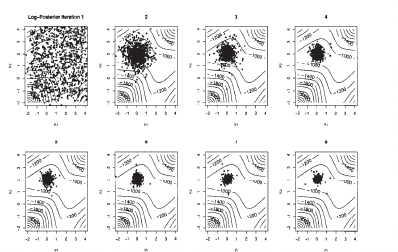

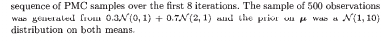

The performance of this algorithm is illustrated on a simulated dataset of 500 observations from $0.3N(0, 1) + 0.7N(2, 1)$. As described by Fig.7 through the sequence of simulated samples, the result of the experiment is that, after 8 iterations of the PMC algorithm, the simulated $\mu$'s are concentrated around the mode of interest and the scales $\nu_k$ (equal to .01, .05, .1 and .5) have been selected according to their relevance, that is, with large weights for the smallest values (as also described in Figure 14.8). While the second spurious mode is visited during the first iteration of the algorithm, the relatively small value of the posterior at this mode implies that the corresponding points are not resampled at the next iteration.

**Fig. 14.7.** Representation of the log-posterior distribution via contours and of a sequence of PMC samples over the first 8 iterations. The sample of 500 observations was generated from $0.3N(0, 1) + 0.7N(2, 1)$ and the prior on $\mu$ was a $N(1, 10)$ distribution on both means.

###  Adaptativity in Sequential Algorithms

A central feature of the PMC method is that the generality in the choice of the proposal distributions $q_t$ is due to the abandonment of the MCMC framework. Indeed, were it not for the importance resampling correction, a pointwise Metropolis-Hastings algorithm would produce a parallel MCMC sampler which simply converges to the target $\pi^{\otimes n}$ in distribution. Similarly, a samplewise Metropolis-Hastings algorithm, that is, a Metropolis-Hastings

**Fig. 14.8.** Evolution of the cumulative weights of the four scales $\nu_k - .5, .1, .05, .01$ for the mixture PMC algorithm over the first 8 iterations corresponding to Figure 14.7.

algorithm aimed at the target distribution $\pi^{\otimes n}$, also produces an asymptotic approximation to this distribution, but its acceptance probability approximately decreases as a power of $n$. This difference is not simply a theoretical advantage since, in one example of Cappe et al. (2004), it actually occurs that a Metropolis-Hastings scheme based on the same proposal does not work well while a PMC algorithm produces correct answers.

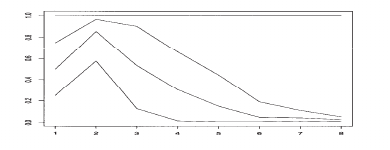



**Example .7. (Continuation of Example.3)** For the stochastic volatility model (14.4), Celeux et al. (2003) consider a noninformative prior $\pi(\beta^2, \varphi, \sigma^2) = 1/(\sigma\beta)$ under the stationarity constraint $|\varphi| < 1$. Posteriors on $\beta^2$ and $\sigma^2$ are both conjugate, conditional on the $z_t$'s, while the posterior distribution of $\varphi$ is less conventional, but a standard proposal (Chib et al. 2002) is a truncated normal distribution on $]-1, 1[$ with mean and variance
$$\frac{(1+\varphi^2)\mu_t/\sigma^2 + 0.5 \exp(-\mu_t)y_t^2(1+\mu_t)/\beta^2 - 0.5}{(1+\varphi^2)/\sigma^2 + 0.5 \exp(-\mu_t)y_t^2/\beta^2}$$
and variance
$$1/\left\{ (1+\varphi^2)/\sigma^2 + 0.5 \exp(-\mu_t)y_t^2/\beta^2 \right\}.$$
There have been many proposals in the literature for simulating the $z_t$'s (see Celeux et al. 2003). For instance, one based on a Taylor expansion of the exponential is a normal distribution with mean
$$\sum_{t=2}^n \frac{z_t z_{t-1}}{\sigma^2} / \sum_{t=2}^n \frac{z_t^2}{\sigma^2} \quad \text{and} \quad \sigma^2 / \sum_{t=2}^n \frac{z_t^2}{\sigma^2}.$$
where $\mu_t = \varphi (z_{t-1} + z_{t+1})/(1+\varphi^2)$ is the conditional expectation of $z_t$ given $z_{t-1}, z_{t+1}$.

In [5]:
import math
import random

# --- Basic Vector Operations for 2D (Core Python) ---
def vector_add(v1, v2):
    return [v1[i] + v2[i] for i in range(len(v1))]

def vector_sub(v1, v2):
    return [v1[i] - v2[i] for i in range(len(v1))]

def scalar_mul_vector(scalar, v):
    return [scalar * v_i for v_i in v]

def vector_dot_product(v1, v2):
    return sum(v1[i] * v2[i] for i in range(len(v1)))

def squared_euclidean_distance(v1, v2):
    diff = vector_sub(v1, v2)
    return vector_dot_product(diff, diff)

# --- Replacements for common NumPy/SciPy functions (from previous implementation) ---

def custom_logsumexp(log_x_list):
    if not log_x_list:
        return -float('inf')
    max_log_x = log_x_list[0]
    for x_val in log_x_list:
        if x_val > max_log_x:
            max_log_x = x_val
    if max_log_x == -float('inf'):
        return -float('inf')
    sum_exp = 0.0
    for x_val in log_x_list:
        sum_exp += math.exp(x_val - max_log_x)
    return max_log_x + math.log(sum_exp)

def custom_normal_sampler(mean, std, size=1):
    if std < 0:
        raise ValueError("Standard deviation cannot be negative.")
    samples = []
    i = 0
    while i < size:
        u1 = random.random()
        u2 = random.random()
        z0 = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
        samples.append(z0 * std + mean)
        i += 1
    if size == 1:
        return samples[0]
    return samples

def custom_mean(data):
    if not data:
        return 0.0
    return sum(data) / len(data)

def custom_sum(data):
    return sum(data)

def custom_variance(data, weights=None):
    if not data:
        return 0.0
    if weights:
        weighted_sum = sum(data[i] * weights[i] for i in range(len(data)))
        total_weights = sum(weights)
        if total_weights == 0: return 0.0
        mean = weighted_sum / total_weights
        sum_sq_diff_weighted = sum(weights[i] * (data[i] - mean)**2 for i in range(len(data)))
        return sum_sq_diff_weighted / total_weights
    else:
        mean = custom_mean(data)
        sum_sq_diff = sum((x - mean)**2 for x in data)
        return sum_sq_diff / len(data)

def custom_std(data, weights=None):
    return math.sqrt(custom_variance(data, weights))

def custom_average(data, weights):
    if not data or not weights or len(data) != len(weights):
        raise ValueError("Data and weights must be non-empty and of same length.")
    weighted_sum = sum(data[i] * weights[i] for i in range(len(data)))
    total_weights = sum(weights)
    if total_weights == 0: return 0.0
    return weighted_sum / total_weights

def custom_random_choice(items, size, p=None):
    if p is None:
        return random.choices(items, k=size)
    else:
        chosen = []
        cumulative_probs = [0.0] * len(p)
        current_sum = 0.0
        for i, prob in enumerate(p):
            current_sum += prob
            cumulative_probs[i] = current_sum
        for _ in range(size):
            r = random.random()
            for i, cum_prob in enumerate(cumulative_probs):
                if r <= cum_prob:
                    chosen.append(items[i])
                    break
        return chosen

# --- New 2D Multivariate Normal PDF and Sampler (Spherical Covariance) ---

def multivariate_normal_log_pdf_2D_spherical(x_vec, mean_vec, variance):
    """
    Calculates the log PDF of a 2D spherical multivariate normal distribution.
    phi(mu; xi, nu) where x_vec=mu, mean_vec=xi, variance=nu.
    Assumes covariance matrix is diag(variance, variance).
    """
    if variance <= 0:
        return -float('inf')
    
    D = 2 # Dimension is fixed at 2
    
    # log( (1 / ( (2*pi)^D * det(Sigma) )^0.5 ) )
    # det(Sigma) = (variance)^D
    log_normalization = -0.5 * D * math.log(2 * math.pi) - 0.5 * D * math.log(variance)
    
    # -0.5 * (x - mu).T @ Sigma_inv @ (x - mu)
    # Sigma_inv = (1/variance) * I_2
    sq_dist = squared_euclidean_distance(x_vec, mean_vec)
    exponent = -0.5 * (1.0 / variance) * sq_dist
    
    return log_normalization + exponent

def multivariate_normal_sampler_2D_spherical(mean_vec, variance, size=1):
    """
    Generates samples from a 2D spherical multivariate normal distribution.
    Assumes covariance matrix is diag(variance, variance).
    """
    if variance < 0:
        raise ValueError("Variance cannot be negative.")
    
    std = math.sqrt(variance)
    samples = []
    for _ in range(size):
        # Sample two independent univariate normals
        z1 = custom_normal_sampler(0, 1)
        z2 = custom_normal_sampler(0, 1)
        
        sample_x = mean_vec[0] + z1 * std
        sample_y = mean_vec[1] + z2 * std
        samples.append([sample_x, sample_y])
        
    if size == 1:
        return samples[0]
    return samples

# --- Algorithm A.62 Mixture PMC Implementation ---

class MixturePMC:
    """
    Implementation of Algorithm A.62 (Mixture PMC Algorithm) in core Python.
    Designed for a 2D parameter space (mu1, mu2) and 1D data x.
    Assumes spherical covariance for proposals.
    """
    
    def __init__(self, data_x, p_mixture, K_scales, epsilon=1e-6, n_particles=1000, max_iterations=50):
        self.data_x = list(data_x) # Observed data (1D list)
        self.p_mixture = p_mixture # Known mixture weight (p)
        
        self.K_scales = list(K_scales) # List of K possible variances (nu_k)
        self.epsilon = epsilon # Small constant for zeta_k update
        self.n_particles = n_particles
        self.max_iterations = max_iterations
        
        # Step 0: Initialization
        self.zeta_k = [1.0 / len(self.K_scales)] * len(self.K_scales) # Initialize zeta_k to 1/K
        
        # History storage
        self.particles_history = [] # Stores lists of 2-element lists [mu1, mu2]
        self.weights_history = [] # Normalized weights
        self.log_weights_history = [] # Log of normalized weights
        self.raw_log_weights_history = [] # Log of UNNORMALIZED weights (for Z estimate)
        self.scale_choices_history = [] # To track which nu_k was used for each particle
        self.normalizing_constant_estimates = []
        self.ess_history = []
        
        # Parameters for the target posterior (Example 5.19 normal mixture model)
        # pi(mu1, mu2 | x) proportional to prior * likelihood
        # Assuming prior is N(theta, sigma_prior_sq / lambda) for each mu
        # For Example 5.19, the standard deviation of components is 1.0 (sigma_noise_sq = 1.0)
        self.prior_theta = 0.0 # Placeholder for prior mean
        self.prior_lambda = 1.0 # Placeholder for prior precision/strength
        self.prior_sigma_sq = 100.0 # Placeholder for prior variance (large for diffuse prior)
        self.noise_sigma_sq = 1.0 # From Example 5.19: N(mu, 1) means variance is 1

    def target_log_pdf(self, mu_vec):
        """
        Calculates the log-posterior density pi(mu1, mu2 | x) for the mixture model.
        Assumes mu_vec = [mu1, mu2]
        """
        mu1, mu2 = mu_vec[0], mu_vec[1]

        # Prior term: exp(-lambda(theta - mu1)^2 / 2*sigma_prior_sq) * exp(-lambda(theta - mu2)^2 / 2*sigma_prior_sq)
        # Log prior for N(prior_theta, prior_sigma_sq / prior_lambda)
        log_prior_mu1 = multivariate_normal_log_pdf_2D_spherical([mu1], [self.prior_theta], self.prior_sigma_sq / self.prior_lambda)
        log_prior_mu2 = multivariate_normal_log_pdf_2D_spherical([mu2], [self.prior_theta], self.prior_sigma_sq / self.prior_lambda)
        log_prior = log_prior_mu1 + log_prior_mu2
        
        # Likelihood term: Product_i { p * N(xi | mu1, noise_sigma_sq) + (1-p) * N(xi | mu2, noise_sigma_sq) }
        log_likelihood_sum_terms = []
        for x_i in self.data_x:
            # log( p * N(x_i | mu1, 1) + (1-p) * N(x_i | mu2, 1) )
            
            # log(p) + log(N(x_i | mu1, 1))
            log_comp1 = math.log(self.p_mixture) + multivariate_normal_log_pdf_2D_spherical([x_i], [mu1], self.noise_sigma_sq)
            
            # log(1-p) + log(N(x_i | mu2, 1))
            log_comp2 = math.log(1.0 - self.p_mixture) + multivariate_normal_log_pdf_2D_spherical([x_i], [mu2], self.noise_sigma_sq)
            
            log_likelihood_sum_terms.append(custom_logsumexp([log_comp1, log_comp2]))
            
        log_likelihood = custom_sum(log_likelihood_sum_terms) # Sum of log-terms for product
        
        return log_prior + log_likelihood

    def initial_proposal(self, size):
        """
        Generates initial particles from an arbitrary distribution.
        Here, a broad 2D spherical normal.
        """
        return multivariate_normal_sampler_2D_spherical([0.0, 0.0], 10.0, size) # Mean 0, Variance 10

    def initial_proposal_log_pdf(self, mu_vec):
        """
        Log PDF of the initial proposal.
        """
        return multivariate_normal_log_pdf_2D_spherical(mu_vec, [0.0, 0.0], 10.0)

    def compute_weighted_proposal_log_pdf(self, mu_vec, parent_mu_vec):
        """
        Computes the denominator in the weight calculation (Step 1.c):
        sum_k { zeta_k * phi(mu_vec; parent_mu_vec, nu_k) }
        This is log(sum_k { zeta_k * phi(...) })
        """
        log_terms = []
        for k in range(len(self.K_scales)):
            zeta = self.zeta_k[k]
            nu_k = self.K_scales[k]
            
            if zeta <= 0: # Avoid log(0)
                log_terms.append(-float('inf'))
                continue

            # log(zeta_k) + log(phi(mu_vec; parent_mu_vec, nu_k))
            log_phi = multivariate_normal_log_pdf_2D_spherical(mu_vec, parent_mu_vec, nu_k)
            log_terms.append(math.log(zeta) + log_phi)
            
        return custom_logsumexp(log_terms)

    def compute_importance_weights(self, particles, parent_particles_for_each_new_particle, scales_used_for_each_new_particle):
        """
        Compute importance weights: ω_i = π(z_i) / q_t(z_i)
        Here, q_t(z_i) = sum_k { zeta_k * phi(z_i; z_i_parent, nu_k) }
        z_i_parent is the parent particle from which z_i was drawn.
        """
        n = len(particles)
        log_weights = [0.0] * n
        raw_log_weights = [0.0] * n # Store unnormalized for Z estimate

        for i in range(n):
            current_particle = particles[i]
            parent_particle = parent_particles_for_each_new_particle[i]
            
            log_target = self.target_log_pdf(current_particle)
            log_proposal_denominator = self.compute_weighted_proposal_log_pdf(current_particle, parent_particle)
            
            raw_log_weights[i] = log_target - log_proposal_denominator
        
        # Normalize log_weights
        log_sum_raw_weights = custom_logsumexp(raw_log_weights)
        normalized_log_weights = [lw - log_sum_raw_weights for lw in raw_log_weights]
        
        weights = [math.exp(lw) for lw in normalized_log_weights]
        
        return weights, normalized_log_weights, raw_log_weights

    def resample(self, particles, weights):
        """
        Resample particles according to weights, and keep track of parent indices.
        Returns resampled particles and their original indices.
        """
        n = len(particles)
        # Items to choose from are the indices of the particles
        original_indices = list(range(n))
        
        # Use custom_random_choice for weighted sampling of indices
        resampled_indices = custom_random_choice(original_indices, size=n, p=weights)
        
        resampled_particles = []
        for idx in resampled_indices:
            resampled_particles.append(particles[idx])
            
        return resampled_particles, resampled_indices
        
    def estimate_integral(self, func, particles, weights):
        """
        Estimate E[h(X)] using importance sampling.
        h(X) is a function of the 2D particle vector.
        """
        weighted_values = []
        for i in range(len(particles)):
            weighted_values.append(weights[i] * func(particles[i]))
            
        return custom_mean(weighted_values)
        
    def run_pmc(self, verbose=True):
        """
        Run Population Monte Carlo Algorithm A.62
        """
        if verbose:
            print("Starting Mixture PMC Algorithm A.62 (Core Python)...")
        
        # Step 0: Initialization is done in __init__ for zeta_k
        
        # Initialize particles for t=0 from initial proposal (arbitrary distribution)
        current_particles = self.initial_proposal(self.n_particles)
        # For t=0, parent particles are just themselves, and scales are not yet chosen
        # For initial weights, use initial proposal's log_pdf directly
        initial_log_target = [self.target_log_pdf(p) for p in current_particles]
        initial_log_proposal = [self.initial_proposal_log_pdf(p) for p in current_particles]
        
        initial_raw_log_weights = [initial_log_target[i] - initial_log_proposal[i] for i in range(self.n_particles)]
        log_sum_initial_raw = custom_logsumexp(initial_raw_log_weights)
        initial_normalized_log_weights = [lw - log_sum_initial_raw for lw in initial_raw_log_weights]
        initial_weights = [math.exp(lw) for lw in initial_normalized_log_weights]

        self.particles_history.append(current_particles)
        self.weights_history.append(initial_weights)
        self.log_weights_history.append(initial_normalized_log_weights)
        self.raw_log_weights_history.append(initial_raw_log_weights) # Store raw weights
        
        # For t=0, ESS and Z estimate
        sum_sq_weights_t0 = custom_sum([w**2 for w in initial_weights])
        ess_t0 = 1.0 / sum_sq_weights_t0 if sum_sq_weights_t0 != 0 else 0.0
        self.ess_history.append(ess_t0)
        
        # Z estimate for t=0 is mean of raw (unnormalized) importance ratios
        self.normalizing_constant_estimates.append(custom_mean([math.exp(lw) for lw in initial_raw_log_weights]))

        # Track which nu_k was used for each particle in current_particles to update zeta_k later
        # For t=0, there's no "parent" choice based on zeta_k, so we'll just assign a dummy or average
        self.scale_choices_history.append([0] * self.n_particles) # Store index of nu_k used

        if verbose:
            print(f"Iteration 1/{self.max_iterations} (Initialization complete)")
            print(f"  ESS: {self.ess_history[-1]:.1f}, Z_hat: {self.normalizing_constant_estimates[-1]:.4f}")
        
        # Loop for subsequent iterations (t=1 to max_iterations-1)
        for t in range(1, self.max_iterations):
            if verbose and t % 5 == 0:
                print(f"Iteration {t+1}/{self.max_iterations}")
            
            # Resample from previous iteration's particles and weights
            # This implements the "Resample the mu_t^(i)'s using the weights" part at the end of previous iteration.
            # So, current_particles are mu_t from previous step, resampled according to their weights.
            # This makes them "parents" for the new generation.
            parent_particles, parent_indices_resampled = self.resample(current_particles, initial_weights)
            
            # To update zeta_k later, we need to know for each parent particle which scale it originally came from.
            # This information isn't directly available in a simple resampling step.
            # The algorithm implies that `r_k` is the count of *resampled* parents that were *originally generated*
            # using scale nu_k. We need to preserve this info through resampling.
            # Let's augment `parent_indices_resampled` to get the original scale choice.
            parent_original_scale_choices = [self.scale_choices_history[-1][idx] for idx in parent_indices_resampled]
            
            # Step 1: Update
            new_particles = [] # mu_{t+1}^{(i)}
            new_parent_references = [] # Store mu_t^{(i')} for each new particle
            scales_used_for_new_particles = [] # Store index of nu_k used for each new particle

            # For zeta_k update later: count how many particles were generated from each nu_k
            # and survived resampling. We already have `parent_original_scale_choices`.
            
            # Sample new particles (mu_{t+1}^{(i)}) based on current parents (mu_t^{(i')}) and chosen scales
            for i in range(self.n_particles):
                parent_mu_i_prime = parent_particles[i] # This is mu_t^{(i')}

                # a. with probability zeta_k, take sigma_{t+1}^{(i)} = nu_k
                # Choose scale_idx based on current zeta_k probabilities
                scale_idx_chosen = custom_random_choice(list(range(len(self.K_scales))), size=1, p=self.zeta_k)[0]
                selected_nu_k = self.K_scales[scale_idx_chosen]
                
                # b. generate mu_{t+1}^{(i)} ~ N_2(mu_t^{(i')}, sigma_{t+1}^{(i)} I_2)
                sampled_mu = multivariate_normal_sampler_2D_spherical(parent_mu_i_prime, selected_nu_k)
                
                new_particles.append(sampled_mu)
                new_parent_references.append(parent_mu_i_prime)
                scales_used_for_new_particles.append(scale_idx_chosen) # Store index of nu_k used

            # c. Compute weights
            # This requires new_particles, their parent_mu_i_prime, and the proposal denominator.
            current_weights, current_log_weights, current_raw_log_weights = \
                self.compute_importance_weights(new_particles, new_parent_references, scales_used_for_new_particles)
            
            # Store results for this iteration
            self.particles_history.append(new_particles)
            self.weights_history.append(current_weights)
            self.log_weights_history.append(current_log_weights)
            self.raw_log_weights_history.append(current_raw_log_weights)
            self.scale_choices_history.append(scales_used_for_new_particles) # Store for next iter's zeta_k update

            # Compute diagnostics
            sum_sq_weights = custom_sum([w**2 for w in current_weights])
            ess = 1.0 / sum_sq_weights if sum_sq_weights != 0 else 0.0
            self.ess_history.append(ess)
            
            # Z estimate: Cumulative mean of raw importance ratios
            all_raw_log_weights = []
            for item in self.raw_log_weights_history:
                all_raw_log_weights.extend(item)
            
            cumulative_raw_weights = [math.exp(lw) for lw in all_raw_log_weights]
            self.normalizing_constant_estimates.append(custom_mean(cumulative_raw_weights))

            if verbose:
                print(f"  ESS: {self.ess_history[-1]:.1f}, Z_hat: {self.normalizing_constant_estimates[-1]:.4f}")

            # Update the zeta_k's for the next iteration (after resampling has happened for current iteration's weights)
            # This is the "resample ... Update the zeta_k's" step.
            # For this, we need the *resampled* particles from the current iteration, and which scale they came from.
            
            # First, resample particles based on `current_weights`
            resampled_particles_current_iter, resampled_indices_current_iter = self.resample(new_particles, current_weights)
            
            # Determine which scales contributed to the resampled particles
            # This is `r_k`: count of resampled particles that were generated using `nu_k`
            # For this, we use `scales_used_for_new_particles` which stores the scale_idx for `new_particles`.
            # We then get the scales used for the `resampled_particles_current_iter`.
            
            r_k_counts = [0] * len(self.K_scales)
            for resampled_idx in resampled_indices_current_iter:
                original_scale_idx = scales_used_for_new_particles[resampled_idx]
                r_k_counts[original_scale_idx] += 1
            
            # Update zeta_k: zeta_k prop to r_k + epsilon
            new_zeta_k_raw = [r_k + self.epsilon for r_k in r_k_counts]
            sum_new_zeta_k_raw = custom_sum(new_zeta_k_raw)
            self.zeta_k = [val / sum_new_zeta_k_raw for val in new_zeta_k_raw]
            
            # Prepare for next iteration: current_particles become the new_particles
            current_particles = new_particles # The new generation of particles (before resampling for next loop)
            initial_weights = current_weights # Their weights (will be used for next iteration's resampling)

        if verbose:
            print("PMC completed!")
        
        return self.particles_history, self.weights_history
        
    def get_final_sample(self):
        """
        Get final weighted sample
        """
        if not self.particles_history:
            raise ValueError("No samples generated. Run PMC first.")
            
        return self.particles_history[-1], self.weights_history[-1]
        
    def estimate_expectation(self, func):
        """
        Estimate E[h(X)] using final sample.
        func: A function that takes a 2D particle [mu1, mu2] and returns a scalar.
        """
        particles, weights = self.get_final_sample()
        return self.estimate_integral(func, particles, weights)


# --- Demo Function ---
def demo_mixture_pmc():
    """Demonstrate Mixture PMC Algorithm A.62"""
    print("=== Mixture PMC Algorithm A.62 Demo (Core Python) ===")
    random.seed(42) # Set seed for reproducibility

    # Define synthetic data (Example 5.19 normal mixture: 0.3*N(0,1) + 0.7*N(5,1))
    # We need to simulate observations 'x' from this mixture.
    true_mu1 = 0.0
    true_mu2 = 5.0
    true_p = 0.3 # Known p
    noise_std = 1.0 # Standard deviation for components N(mu, 1)

    n_data_points = 200
    data_x = []
    for _ in range(n_data_points):
        if random.random() < true_p:
            data_x.append(custom_normal_sampler(true_mu1, noise_std))
        else:
            data_x.append(custom_normal_sampler(true_mu2, noise_std))
    
    print(f"Generated {n_data_points} data points from a mixture with true (mu1, mu2) = ({true_mu1}, {true_mu2})")

    # Define K scales (nu_k)
    K_scales = [0.1, 0.5, 1.0, 5.0, 10.0] # Variances for proposals

    # Run PMC
    pmc = MixturePMC(
        data_x=data_x,
        p_mixture=true_p,
        K_scales=K_scales,
        n_particles=1000,
        max_iterations=50
    )
    
    pmc.run_pmc(verbose=True)
    
    # Estimate posterior means of mu1 and mu2
    estimated_mu1 = pmc.estimate_expectation(lambda mu_vec: mu_vec[0])
    estimated_mu2 = pmc.estimate_expectation(lambda mu_vec: mu_vec[1])

    print(f"\nTrue (mu1, mu2): ({true_mu1}, {true_mu2})")
    print(f"Estimated (mu1, mu2): ({estimated_mu1:.3f}, {estimated_mu2:.3f})")
    
    # Print final ESS and Z_hat
    print(f"Final ESS: {pmc.ess_history[-1]:.1f}")
    print(f"Final Normalizing Constant Estimate: {pmc.normalizing_constant_estimates[-1]:.4f}")

    # Print final zeta_k distribution
    print(f"Final zeta_k distribution for scales {K_scales}:")
    for k_idx, zeta_val in enumerate(pmc.zeta_k):
        print(f"  nu_{k_idx+1}={K_scales[k_idx]:.1f}: {zeta_val:.4f}")

    return pmc

# --- Main execution block ---
if __name__ == "__main__":
    pmc_instance = demo_mixture_pmc()

    # You could add more analysis here, e.g.,
    # Plotting is not possible without matplotlib.
    # print("\nNormalizing constant evolution:")
    # for i, z_est in enumerate(pmc_instance.normalizing_constant_estimates):
    #     print(f"Iter {i+1}: {z_est:.4f}")

=== Mixture PMC Algorithm A.62 Demo (Core Python) ===
Generated 200 data points from a mixture with true (mu1, mu2) = (0.0, 5.0)
Starting Mixture PMC Algorithm A.62 (Core Python)...
Iteration 1/50 (Initialization complete)
  ESS: 1.4, Z_hat: 0.0000
  ESS: 39.1, Z_hat: 0.0000
  ESS: 139.4, Z_hat: 0.0000
  ESS: 180.5, Z_hat: 0.0000
  ESS: 186.9, Z_hat: 0.0000
Iteration 6/50
  ESS: 197.3, Z_hat: 0.0000
  ESS: 190.7, Z_hat: 0.0000
  ESS: 192.1, Z_hat: 0.0000
  ESS: 176.6, Z_hat: 0.0000
  ESS: 201.4, Z_hat: 0.0000
Iteration 11/50
  ESS: 188.1, Z_hat: 0.0000
  ESS: 171.8, Z_hat: 0.0000
  ESS: 187.0, Z_hat: 0.0000
  ESS: 189.6, Z_hat: 0.0000
  ESS: 193.1, Z_hat: 0.0000
Iteration 16/50
  ESS: 189.1, Z_hat: 0.0000
  ESS: 194.1, Z_hat: 0.0000
  ESS: 182.3, Z_hat: 0.0000
  ESS: 186.0, Z_hat: 0.0000
  ESS: 191.7, Z_hat: 0.0000
Iteration 21/50
  ESS: 188.0, Z_hat: 0.0000
  ESS: 186.7, Z_hat: 0.0000
  ESS: 183.3, Z_hat: 0.0000
  ESS: 188.5, Z_hat: 0.0000
  ESS: 183.4, Z_hat: 0.0000
Iteration 26/50
 

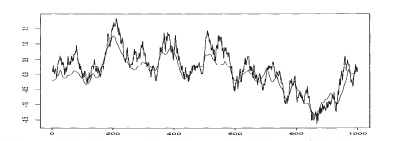



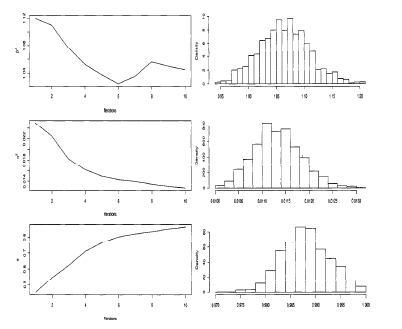



Note the formal similarity with Warnes’s (2001) use of the previous sample to build a nonparametric kernel approximation to $\pi$. The main difference is that the proposal does not aim at a good approximation of $\pi$ using standard nonparametric results like bandwidth selection, but may remain multiscaled over the iterations, as illustrated in Section 14.4.4 The main feature of the PMC algorithm is indeed that several scenarios can be tested in parallel and tuned along iterations, a feature that can hardly be achieved within the domain of MCMC algorithms (Section 7.6.3).

There also are similarities between the PMC algorithm and earlier proposals in the particle system literature, in particular with Algorithm [A.60], since the latter also considers iterated samples with (SIR) resampling steps based on importance weights. A major difference, though (besides the dynamic setting of moving target distributions), is that [A.60] remains an MCMC algorithm and thus needs to use Markov transition kernels with a given stationary distribution. There is also a connection with Chopin (2002), who considers iterated importance sampling with changing proposals. His setting is a special case of the PMC algorithm in a Bayesian framework, where the proposals $q_t$ are the posterior distributions associated with a portion $k_t$ of the observed dataset (and are thus independent of $x$ and of the previous samples). As detailed in the following sections, the range of possible choices for the $q_t$’s is actually much wider.

### 14.4.4 An Illustration for the Mixture Model

Consider the normal mixture model of Example 5.19, that is, $pN(\mu_1, 1) + (1 - p)N(\mu_2, 1)$, where $p \ne 1/2$ is known, and the corresponding simulation from $\pi(\mu_1, \mu_2|\mathbf{x})$, the posterior distribution for an i.i.d sample $\mathbf{x} = (x_1, \dots, x_n)$ and an arbitrary proper prior on $(\mu_1, \mu_2)$. While we presented in Chapter 9 a Gibbs sampler based on a data augmentation step via the indicator variables, Celeux et al. (2003) show that a PMC sampler can be efficiently implemented without this augmentation step.

Given the posterior distribution
$$\pi(\mu_1, \mu_2|\mathbf{x}) \propto \exp(-\lambda(\theta - \mu_1)^2 / 2\sigma^2) \exp(-\lambda(\theta - \mu_2)^2 / 2\sigma^2)$$
$$\prod_{i=1}^n \left\{ p \exp(-(x_i - \mu_1)^2 / 2\sigma^2) + (1 - p) \exp(-(x_i - \mu_2)^2 / 2\sigma^2) \right\},$$
a natural possibility is to choose a random walk for the proposal distribution (see Section 7.5). That is, starting from a sample of values of $\mu = (\mu_1, \mu_2)$, generate random isotropic perturbations of the points of this sample.

The difficult issue of selecting the scale of the random walk (see Section 7.6), found in MCMC settings, can be bypassed by virtue of the adaptivity of the PMC algorithm. Indeed, if we take as proposals $q_t$ normal distributions centered at the points of the current sample, $N_2(\mu_t^{(i)}, \sigma^2 \mathbf{I}_2)$, the variance factors $\sigma_k$ can be chosen at random from a set of $K$ scales $\nu_k$ ($1 \le k \le K$) ranging from, e.g., $10^0$ down to $10^{-3}$ if this range is compatible with the range of the observations. At each iteration $t$ of the PMC algorithm, the probability of choosing a particular scale $\nu_k$ can be calibrated accordingly to the performance of the different scales over the previous iterations. For instance, possible criterion is to select a scale proportional to its non-degeneracy rate on the previous iterations, that is, the percentage of points associated with $\nu_k$ that survived past the resampling step 3. The reasoning behind this scheme is that, if most $\mu_t^{(i)}$s associated with a given scale $\nu_k$ are not resampled, the scale is not appropriate and thus should not be much used in the next iterations. However, when the survival rate is null, in order to avoid a definitive removal of the corresponding scale, the next probability $\zeta_k$ is set to a positive value $\epsilon$.

In order to smooth the selection of the scales, Rao-Blackwellization should also be used in the computation of the importance weights, using as the denominator
$$\sum_k \zeta_k \varphi \left( \mu_t^{(i)}; \mu_t^{(i')}, \nu_k \right),$$
where $\varphi(\mu; \xi, \nu)$ here denotes the density of the two-dimensional normal distribution with mean $\xi$ and variance $\nu \mathbf{I}_2$ at the vector $\mu$.

The corresponding PMC algorithm thus looks as follows.

**Algorithm A.62 —Mixture PMC algorithm—**

**Step 0: Initialization**
For $i = 1, \dots, n$, generate $\mu_1^{(i)}$ from an arbitrary distribution.
For $k = 1, \dots, K$, set $\nu_k$ and $\zeta_k = 1/K$.

**Step 1: Update**
For $i = 1, \dots, n$,
a. with probability $\zeta_k$, take $\sigma_{t+1}^{(i)} = \nu_k$
b. generate
$$\mu_{t+1}^{(i)} \sim N_2 \left( \mu_t^{(i')}, \sigma_{t+1}^{(i)} \mathbf{I}_2 \right)$$c. compute the weights$$\frac{\pi \left( \mu_{t+1}^{(i)} | \mathbf{x} \right)}{\sum_k \zeta_k \varphi \left( \mu_{t+1}^{(i)}; \mu_t^{(i')}, \nu_k \right)}$$

Resample the $\mu_{t+1}^{(i)}$'s using the weights.
Update the $\zeta_k$'s as $\zeta_k \propto r_k + \epsilon$ where $r_k$ is the number of $\mu_t$'s generated with variance $\nu_k$ that have been resampled in the previous step.

---

Celeux et al. (2003) use a simulated dataset of size $n=1000$ with $\beta^2=1$, $\varphi=0.99$ and $\sigma^2=0.01$, in order to compare the performance of the PMC algorithm with an MCMC algorithm based on exactly the same proposals.

First, the results of the MCMC algorithm, based on 10,000 iterations, are presented in Fig.9 and 10. The estimate of $\beta^2$ (over the last 5000 simulated values) is 0.98, while the estimate of $\varphi$ is equal to 0.89 and the estimate of $\sigma^2$ is equal to 0.099. While the reconstituted volatilities are on average close to the true values, the parameter estimates are rather poor, even though the cumulative averages of Figure 14.9. do not exhibit any difficulty with convergence. Note, however, the slow mixing on $\beta$ in Figure 14.9 (upper left) and, to a lesser degree, on $\sigma^2$ (middle left).

**Fig. 14.9.** Evolution of the MCMC samples for the three parameters (left) and convergence of the MCMC estimators (right). (Source: Celeux et al. 2003.)

Then, with the same proposal distributions, Celeux et al. (2003) have iterated a PMC algorithm ten times with $M=1000$. The results are presented in Figures 14.11 and 14.12. The estimate of $\varphi$ (over the 10 iterations) is equal to 0.87, while the estimate of $\sigma^2$ is equal to 0.012 and the estimate of $\beta^2$ is equal to 1.04. These estimations are clearly closer to the true values than the ones obtained with the MCMC algorithm. (Note that the scales on Figure 14.11 (left) are much smaller than those of Figure 14.9 (right).) Moreover, Figure 14.12 provides an excellent reconstitution of the volatilities.

#### Code already given in above

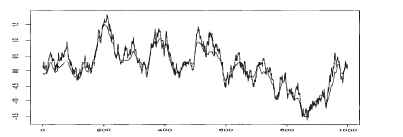



It seems you're asking for the text and mathematical formulas from the provided images to be formatted in Markdown, suitable for a Jupyter Notebook, with LaTeX for the equations. I will process each image and extract the relevant content.

Here's the combined content from the images you provided, formatted as requested:

---

Note the formal similarity with Warnes’s (2001) use of the previous sample to build a nonparametric kernel approximation to $\pi$. The main difference is that the proposal does not aim at a good approximation of $\pi$ using standard nonparametric results like bandwidth selection, but may remain multiscaled over the iterations, as illustrated in Section 14.4.4 The main feature of the PMC algorithm is indeed that several scenarios can be tested in parallel and tuned along iterations, a feature that can hardly be achieved within the domain of MCMC algorithms (Section 7.6.3).

There also are similarities between the PMC algorithm and earlier proposals in the particle system literature, in particular with Algorithm [A.60], since the latter also considers iterated samples with (SIR) resampling steps based on importance weights. A major difference, though (besides the dynamic setting of moving target distributions), is that [A.60] remains an MCMC algorithm and thus needs to use Markov transition kernels with a given stationary distribution. There is also a connection with Chopin (2002), who considers iterated importance sampling with changing proposals. His setting is a special case of the PMC algorithm in a Bayesian framework, where the proposals $q_t$ are the posterior distributions associated with a portion $k_t$ of the observed dataset (and are thus independent of $x$ and of the previous samples). As detailed in the following sections, the range of possible choices for the $q_t$’s is actually much wider.

### 14.4.4 An Illustration for the Mixture Model

Consider the normal mixture model of Example 5.19, that is, $pN(\mu_1, 1) + (1 - p)N(\mu_2, 1)$, where $p \ne 1/2$ is known, and the corresponding simulation from $\pi(\mu_1, \mu_2|\mathbf{x})$, the posterior distribution for an i.i.d sample $\mathbf{x} = (x_1, \dots, x_n)$ and an arbitrary proper prior on $(\mu_1, \mu_2)$. While we presented in Chapter 9 a Gibbs sampler based on a data augmentation step via the indicator variables, Celeux et al. (2003) show that a PMC sampler can be efficiently implemented without this augmentation step.

Given the posterior distribution
$$\pi(\mu_1, \mu_2|\mathbf{x}) \propto \exp(-\lambda(\theta - \mu_1)^2 / 2\sigma^2) \exp(-\lambda(\theta - \mu_2)^2 / 2\sigma^2)$$
$$\prod_{i=1}^n \left\{ p \exp(-(x_i - \mu_1)^2 / 2\sigma^2) + (1 - p) \exp(-(x_i - \mu_2)^2 / 2\sigma^2) \right\},$$
a natural possibility is to choose a random walk for the proposal distribution (see Section 7.5). That is, starting from a sample of values of $\mu = (\mu_1, \mu_2)$, generate random isotropic perturbations of the points of this sample.

The difficult issue of selecting the scale of the random walk (see Section 7.6), found in MCMC settings, can be bypassed by virtue of the adaptivity of the PMC algorithm. Indeed, if we take as proposals $q_t$ normal distributions centered at the points of the current sample, $N_2(\mu_t^{(i)}, \sigma^2 \mathbf{I}_2)$, the variance factors $\sigma_k$ can be chosen at random from a set of $K$ scales $\nu_k$ ($1 \le k \le K$) ranging from, e.g., $10^0$ down to $10^{-3}$ if this range is compatible with the range of the observations. At each iteration $t$ of the PMC algorithm, the probability of choosing a particular scale $\nu_k$ can be calibrated accordingly to the performance of the different scales over the previous iterations. For instance, possible criterion is to select a scale proportional to its non-degeneracy rate on the previous iterations, that is, the percentage of points associated with $\nu_k$ that survived past the resampling step 3. The reasoning behind this scheme is that, if most $\mu_t^{(i)}$s associated with a given scale $\nu_k$ are not resampled, the scale is not appropriate and thus should not be much used in the next iterations. However, when the survival rate is null, in order to avoid a definitive removal of the corresponding scale, the next probability $\zeta_k$ is set to a positive value $\epsilon$.

In order to smooth the selection of the scales, Rao-Blackwellization should also be used in the computation of the importance weights, using as the denominator
$$\sum_k \zeta_k \varphi \left( \mu_t^{(i)}; \mu_t^{(i')}, \nu_k \right),$$
where $\varphi(\mu; \xi, \nu)$ here denotes the density of the two-dimensional normal distribution with mean $\xi$ and variance $\nu \mathbf{I}_2$ at the vector $\mu$.

The corresponding PMC algorithm thus looks as follows.

**Algorithm A.62 —Mixture PMC algorithm—**

**Step 0: Initialization**
For $i = 1, \dots, n$, generate $\mu_1^{(i)}$ from an arbitrary distribution.
For $k = 1, \dots, K$, set $\nu_k$ and $\zeta_k = 1/K$.

**Step 1: Update**
For $i = 1, \dots, n$,
a. with probability $\zeta_k$, take $\sigma_{t+1}^{(i)} = \nu_k$
b. generate
$$\mu_{t+1}^{(i)} \sim N_2 \left( \mu_t^{(i')}, \sigma_{t+1}^{(i)} \mathbf{I}_2 \right)$$c. compute the weights$$\frac{\pi \left( \mu_{t+1}^{(i)} | \mathbf{x} \right)}{\sum_k \zeta_k \varphi \left( \mu_{t+1}^{(i)}; \mu_t^{(i')}, \nu_k \right)}$$

Resample the $\mu_{t+1}^{(i)}$'s using the weights.
Update the $\zeta_k$'s as $\zeta_k \propto r_k + \epsilon$ where $r_k$ is the number of $\mu_t$'s generated with variance $\nu_k$ that have been resampled in the previous step.

---

**Fig. 14.12.** Comparison of the true volatility (black) with the PMC estimation based on the 10th iteration weighted PMC sample (grey). (Source: Celeux et al. 2003.)

As shown in Cappé et al. (2004) (see also West 1992 and Guilllin et al. 2004), the PMC framework allows, in addition, for a construction of *adaptive* schemes, i.e., of proposals that correct themselves against past performances, that is much easier than in MCMC setups, as described in Section 7.6.3. Indeed, from a theoretical point of view, ergodicity is not an issue for PMC methods since the validity is obtained via importance sampling justifications and, from a practical point of view, the total freedom allowed by unrestricted parallel simulations is a major asset.

An extension of the PMC method can be found in Del Moral and Doucet (2003): their generalization is to consider two Markov kernels, $K_+$ and $K_-$, such that, given a particle at time $t-1$, $\tilde{x}_i^{(t-1)}$, a new particle $\tilde{x}_i^{(t)}$ is generated from $K_+(\tilde{x}_i^{(t-1)}, \tilde{x})$ and associated with a weight
$$\omega_i(t) \propto \frac{\pi(\tilde{x}_i^{(t)}) K_-(\tilde{x}_i^{(t)}, \tilde{x}_i^{(t-1)})}{\pi(\tilde{x}_i^{(t-1)}) K_+(\tilde{x}_i^{(t-1)}, \tilde{x}_i^{(t)})}$$As in Algorithm [A.61], the sample $(x_1^{(t)}, \dots, x_n^{(t)})$ is then obtained by multinomial sampling from the $\tilde{x}_i^{(t)}$'s, using the weights $\omega_i^{(t)}$. The most intriguing feature of this extension is that the kernel $K_-$ is irrelevant for the unbiasedness of the new sample. Indeed,$$E \left[ h(\tilde{X}_i^{(t)}) \frac{\pi(\tilde{x}_i^{(t)}) K_-(\tilde{x}_i^{(t)}, \tilde{x}_i^{(t-1)})}{\pi(\tilde{x}_i^{(t-1)}) K_+(\tilde{x}_i^{(t-1)}, \tilde{x}_i^{(t)})} \right] = \int h(\tilde{x}) \pi(\tilde{x}) K_-(\tilde{x}, x) \,dx \,d\tilde{x}$$
$$= E^R[h(X)] \,.$$
whatever $K_-$ is chosen; the only requirement is that $K_-(\tilde{x}, \tilde{x})$ integrates to 1 as a function of $x$ (which is reminiscent of Monte Carlo marginalization; see Problem 3.21).

While this scheme does provide a valid PMC algorithm, what remains to be assessed is whether wealth is a mixed blessing, that is, if the added

